In [21]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.impute import SimpleImputer
import warnings

import sklearn
import skforecast
import utils as u
from sklearn.metrics import classification_report
import joblib

warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version scikit-learn: {sklearn.__version__}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")

Version skforecast: 0.13.0
Version scikit-learn: 1.5.2
Version pandas: 2.2.3
Version numpy: 1.26.4


## Loading meme data

In [22]:
gaming = pd.read_csv('../data_28/processed/gaming.csv')
ai = pd.read_csv('../data_28/processed/ai.csv')
meme = pd.read_csv('../data_28/processed/meme.csv')
rwa = pd.read_csv('../data_28/processed/rwa.csv')

gaming.shape, ai.shape, meme.shape, rwa.shape

((125654, 10), (113423, 10), (33039, 10), (52339, 10))

## Preprocessing data

In [23]:
days_to_predict = 7

In [24]:
class category_data:
    def __init__(self, train_data, test_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler):
        self.train_data = train_data
        self.test_data = test_data
        self.series_dict = series_dict
        self.exog_dict = exog_dict
        self.future_exog_dict = future_exog_dict
        self.series_scaler = series_scaler
        self.exog_scaler = exog_scaler
        self.forecaster = None
        self.predictions = None
        self.og_train = None
        self.og_test = None
        self.og_pred = None
        self.error_df = None
        self.close_df = None

In [25]:
def generate_data_object(data: pd.DataFrame, days: int):
    train_data, test_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler = u.preprocess(data, days_to_predict=days)
    data_obj = category_data(train_data, test_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler)
    return data_obj

In [26]:
gaming_obj = generate_data_object(gaming, days_to_predict)
ai_obj = generate_data_object(ai, days_to_predict)
meme_obj = generate_data_object(meme, days_to_predict)
rwa_obj = generate_data_object(rwa, days_to_predict)

## Checking the amount of tokens

In [27]:
gaming_obj.train_data['id'].nunique()

56

In [28]:
ai_obj.train_data['id'].nunique()

31

In [29]:
meme_obj.train_data['id'].nunique()

18

In [30]:
rwa_obj.train_data['id'].nunique()

16

## Finding best forecaster with gridsearch

In [31]:
gaming_obj.forecaster = u.train_best_forecaster(gaming_obj.series_dict, gaming_obj.exog_dict, gaming_obj.future_exog_dict, gaming_obj.test_data, future_days=days_to_predict)
ai_obj.forecaster = u.train_best_forecaster(ai_obj.series_dict, ai_obj.exog_dict, ai_obj.future_exog_dict, ai_obj.test_data, future_days=days_to_predict)
meme_obj.forecaster = u.train_best_forecaster(meme_obj.series_dict, meme_obj.exog_dict, meme_obj.future_exog_dict, meme_obj.test_data, future_days=days_to_predict)
rwa_obj.forecaster = u.train_best_forecaster(rwa_obj.series_dict, rwa_obj.exog_dict, rwa_obj.future_exog_dict, rwa_obj.test_data, future_days=days_to_predict)

Training model with parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 5, 'min_split_gain': 0.001, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 1.0}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3881
[LightGBM] [Info] Number of data points in the train set: 74774, number of used features: 16
[LightGBM] [Info] Start training from score -0.008280
Training model with parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 5, 'min_split_gain': 0.001, 'n_estimators': 100, 'num_leaves': 63, 'subsample': 1.0}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3881
[LightGBM] [Info] Number of data points in the train 

## Training with CatBoost

In [32]:
# gaming_obj.forecaster = u.train_forecaster(gaming_obj.series_dict, gaming_obj.exog_dict)
# ai_obj.forecaster = u.train_forecaster(ai_obj.series_dict, ai_obj.exog_dict)
# meme_obj.forecaster = u.train_forecaster(meme_obj.series_dict, meme_obj.exog_dict)
# rwa_obj.forecaster = u.train_forecaster(rwa_obj.series_dict, rwa_obj.exog_dict)

## Saving the models

In [33]:
# joblib.dump(gaming_obj.forecaster, '../models_28/gaming_forecaster_lgbm_28.pkl')
# joblib.dump(ai_obj.forecaster, '../models_28/ai_forecaster_lgbm_28.pkl')
# joblib.dump(meme_obj.forecaster, '../models_28/meme_forecaster_lgbm_28.pkl')
# joblib.dump(rwa_obj.forecaster, '../models_28/rwa_forecaster_lgbm_28.pkl')

## Loading the models from a specific training

In [34]:
# load model from file
# gaming_forecaster = joblib.load('../models_28/gaming_forecaster_lgbm_28.pkl')
# ai_forecaster = joblib.load('../models_28/ai_forecaster_lgbm_28.pkl')
# meme_forecaster = joblib.load('../models_28/meme_forecaster_lgbm_28.pkl')
# rwa_forecaster = joblib.load('../models_28/rwa_forecaster_lgbm_28.pkl')

## Generate predictions

In [35]:
gaming_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=gaming_obj.forecaster, future_exog_dict=gaming_obj.future_exog_dict)
ai_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=ai_obj.forecaster, future_exog_dict=ai_obj.future_exog_dict)
meme_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=meme_obj.forecaster, future_exog_dict=meme_obj.future_exog_dict)
rwa_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=rwa_obj.forecaster, future_exog_dict=rwa_obj.future_exog_dict)

In [36]:
# gaming_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=gaming_forecaster, future_exog_dict=gaming_obj.future_exog_dict)
# ai_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=ai_forecaster, future_exog_dict=ai_obj.future_exog_dict)
# meme_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=meme_forecaster, future_exog_dict=meme_obj.future_exog_dict)
# rwa_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=rwa_forecaster, future_exog_dict=rwa_obj.future_exog_dict)

## Inverse scaling the data and getting the real values

In [37]:
gaming_obj.og_train, gaming_obj.og_test, gaming_obj.og_pred = u.inverse_scaling(train_df=gaming_obj.train_data, test_df=gaming_obj.test_data, pred_df=gaming_obj.predictions, scalers=gaming_obj.series_scaler)
ai_obj.og_train, ai_obj.og_test, ai_obj.og_pred = u.inverse_scaling(train_df=ai_obj.train_data, test_df=ai_obj.test_data, pred_df=ai_obj.predictions, scalers=ai_obj.series_scaler)
meme_obj.og_train, meme_obj.og_test, meme_obj.og_pred = u.inverse_scaling(train_df=meme_obj.train_data, test_df=meme_obj.test_data, pred_df=meme_obj.predictions, scalers=meme_obj.series_scaler)
rwa_obj.og_train, rwa_obj.og_test, rwa_obj.og_pred = u.inverse_scaling(train_df=rwa_obj.train_data, test_df=rwa_obj.test_data, pred_df=rwa_obj.predictions, scalers=rwa_obj.series_scaler)

## Checking that we did not lose data

In [38]:
print(gaming_obj.og_train['id'].nunique())
print(ai_obj.og_train['id'].nunique())
print(meme_obj.og_train['id'].nunique())
print(rwa_obj.og_train['id'].nunique())

56
31
18
16


## Generating comparisons in order to inspect the classification report

In [39]:
gaming_obj.close_df = u.get_last_close_info(gaming_obj.og_train, gaming_obj.og_test, gaming_obj.og_pred)
ai_obj.close_df = u.get_last_close_info(ai_obj.og_train, ai_obj.og_test, ai_obj.og_pred)
meme_obj.close_df = u.get_last_close_info(meme_obj.og_train, meme_obj.og_test, meme_obj.og_pred)
rwa_obj.close_df = u.get_last_close_info(rwa_obj.og_train, rwa_obj.og_test, rwa_obj.og_pred)

In [40]:
print("Gaming")
print(classification_report(gaming_obj.close_df['real_went_up'], gaming_obj.close_df['pred_went_up']))
print("AI")
print(classification_report(ai_obj.close_df['real_went_up'], ai_obj.close_df['pred_went_up']))
print("Meme")
print(classification_report(meme_obj.close_df['real_went_up'], meme_obj.close_df['pred_went_up']))
print("RWA")
print(classification_report(rwa_obj.close_df['real_went_up'], rwa_obj.close_df['pred_went_up']))

Gaming
              precision    recall  f1-score   support

         0.0       0.50      0.18      0.26        17
         1.0       0.71      0.92      0.80        38

    accuracy                           0.69        55
   macro avg       0.61      0.55      0.53        55
weighted avg       0.65      0.69      0.64        55

AI
              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25        10
         1.0       0.68      0.81      0.74        21

    accuracy                           0.61        31
   macro avg       0.51      0.50      0.49        31
weighted avg       0.57      0.61      0.58        31

Meme
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.77      0.71      0.74        14

    accuracy                           0.59        17
   macro avg       0.38      0.36      0.37        17
weighted avg       0.63      0.59      0.61        17

RWA


## Calculate MAPE and other metrics

In [41]:
gaming_obj.error_df = u.compute_errors(train_data=gaming_obj.og_train, predictions_x_days=gaming_obj.og_pred, test_data=gaming_obj.og_test)
ai_obj.error_df = u.compute_errors(train_data=ai_obj.og_train, predictions_x_days=ai_obj.og_pred, test_data=ai_obj.og_test)
meme_obj.error_df = u.compute_errors(train_data=meme_obj.og_train, predictions_x_days=meme_obj.og_pred, test_data=meme_obj.og_test)
rwa_obj.error_df = u.compute_errors(train_data=rwa_obj.og_train, predictions_x_days=rwa_obj.og_pred, test_data=rwa_obj.og_test)

In [42]:
ai_obj.error_df

Token ID           MSE       MAE        MAPE  \
0   050cd820-2c82-4222-892c-e6f2859625c7  7.044528e-09  0.000077   15.838990   
1   0bb97d30-b5bb-45d6-b105-e49436cace0e  1.123349e-04  0.009568    2.909237   
2   0d1428e8-2b88-4314-9b1e-aa664b34a5fe  2.388476e-05  0.004653   71.467920   
3   172a1e9a-f56c-4386-85e1-093d801e4e93  2.173746e-06  0.001191    3.234942   
4   18b987bb-2597-4288-a28e-08d7dbce2ee2  5.551473e-07  0.000686   38.753542   
5   196199f6-1c8f-4be4-83dd-733866d6d558  9.029122e-11  0.000009   32.725694   
6   1e389c02-0a09-4b57-9c50-3a74bca12e4f  4.145790e-02  0.191869    3.577756   
7   1f34fd87-5598-40e7-ac78-7efd6bd28bdd  8.084941e-05  0.008389   11.226442   
8   22820bda-48eb-45bd-b189-af3253ab57c0  3.683855e-06  0.001469    7.766969   
9   3ee65bec-c8c8-482d-ba5c-5c594cc86f2f  1.235090e-05  0.003469   27.001813   
10  42876b1c-10af-47c9-a4f9-853fc207f7b0  9.498137e-06  0.003045  138.062900   
11  490aeb9f-fdf1-4bea-a002-2b294cff0454  3.310279e-05  0.004678    4.293701   
12  5416e814-8023-4f66-aadb-a063afca2414  8.954480e-02  0.260656    5.562971   
13  68221f51-660f-4bed-88e4-680165a9be0c  1.440402e-03  0.033476    6.355663   
14  6a44ac10-0d34-4cf2-a947-53d8bdd54f10  1.317717e-06  0.000935    4.047500   
15  6f67ca1a-5a43-449c-847e-5cfac8d98744  2.581484e-03  0.040632    2.673302   
16  8b88329d-a168-4590-a664-110db3c90308  6.551315e-05  0.007098   12.843848   
17  8cce4515-ed44-4d09-9092-7aef3d046e95  5.511051e-08  0.000198    3.242695   
18  8d807555-a3fa-493c-82bb-fea5c93082f0  1.030368e-07  0.000311   14.150214   
19  978aa54d-1bbb-4f73-bac4-ba7507c27a76  1.218899e-04  0.009284    5.461044   
20  9bb73af8-6ad9-4825-b17c-4ccc6a8fbcf8  4.966108e-08  0.000207    6.983880   
21  a8b53d2d-a2fd-4586-ba67-345e182cc919  2.313135e-04  0.012637    6.714577   
22  aaaac613-ebb5-4af0-ab62-1675cf0a8b8a  1.213242e-06  0.000835    1.947800   
23  aeca591d-3294-42de-bb85-c6a484bacd96  1.153132e-01  0.293488    3.460238   
24  b262d7bb-23ec-475c-8104-c5088e787cb4  2.111378e-06  0.001378   21.085075   
25  b2d068ec-fbd5-4884-beb0-7ad884773733  1.851878e-07  0.000418   19.280046   
26  bc49d919-2925-472d-8bef-e189c0059ccc  2.981737e-01  0.491797    3.360780   
27  d0811fcb-3fcc-41e5-b0f6-cd996b40721e  6.788995e-03  0.078958   31.800844   
28  d1f48a57-2c48-4512-abd6-90e8c29e5aba  4.776073e-03  0.059831    4.162634   
29  ddb361c5-0827-4324-a9ba-ee4fdbf475d9  2.535954e-03  0.036896    2.954185   
30  f59f39ff-5230-42bb-acce-7767dc84cd83  5.620251e-06  0.002161   28.375953   

   MAPE (%)  
0    15.84%  
1     2.91%  
2    71.47%  
3     3.23%  
4    38.75%  
5    32.73%  
6     3.58%  
7    11.23%  
8     7.77%  
9    27.00%  
10  138.06%  
11    4.29%  
12    5.56%  
13    6.36%  
14    4.05%  
15    2.67%  
16   12.84%  
17    3.24%  
18   14.15%  
19    5.46%  
20    6.98%  
21    6.71%  
22    1.95%  
23    3.46%  
24   21.09%  
25   19.28%  
26    3.36%  
27   31.80%  
28    4.16%  
29    2.95%  
30   28.38%

## Viual comparison between the predicted close prices and the real ones

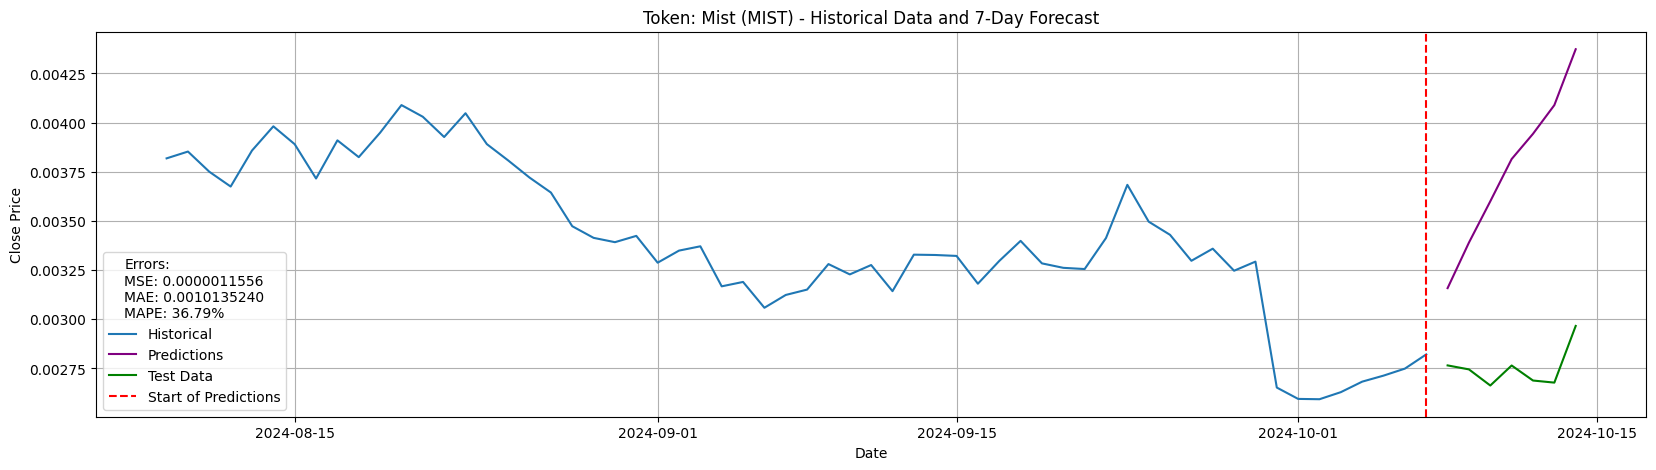

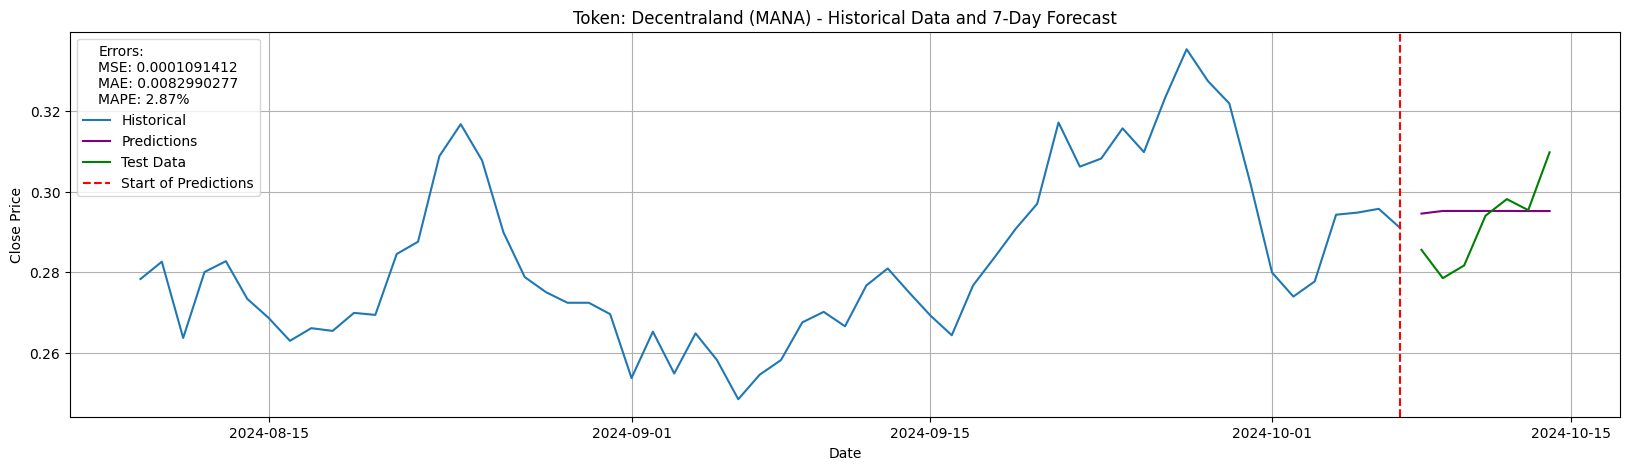

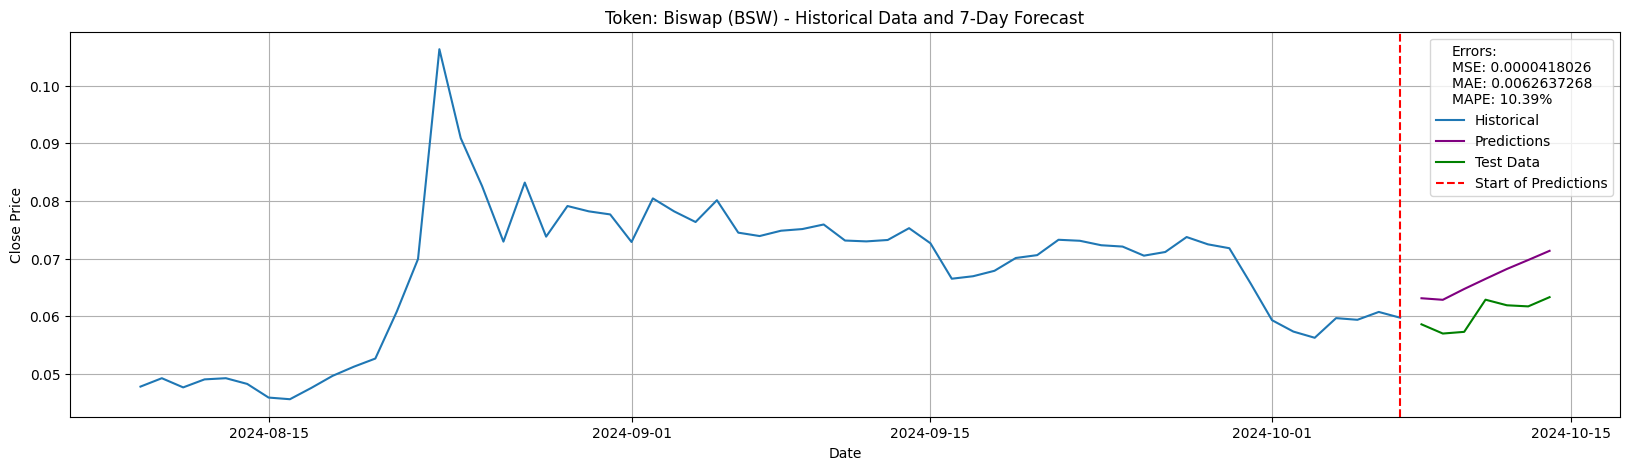

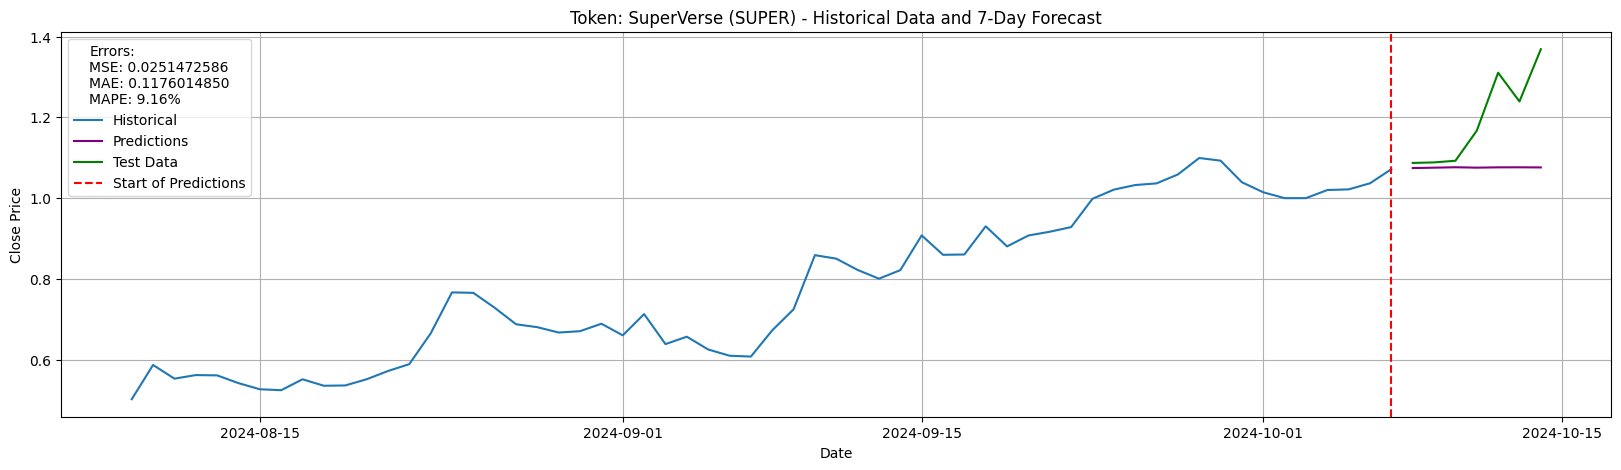

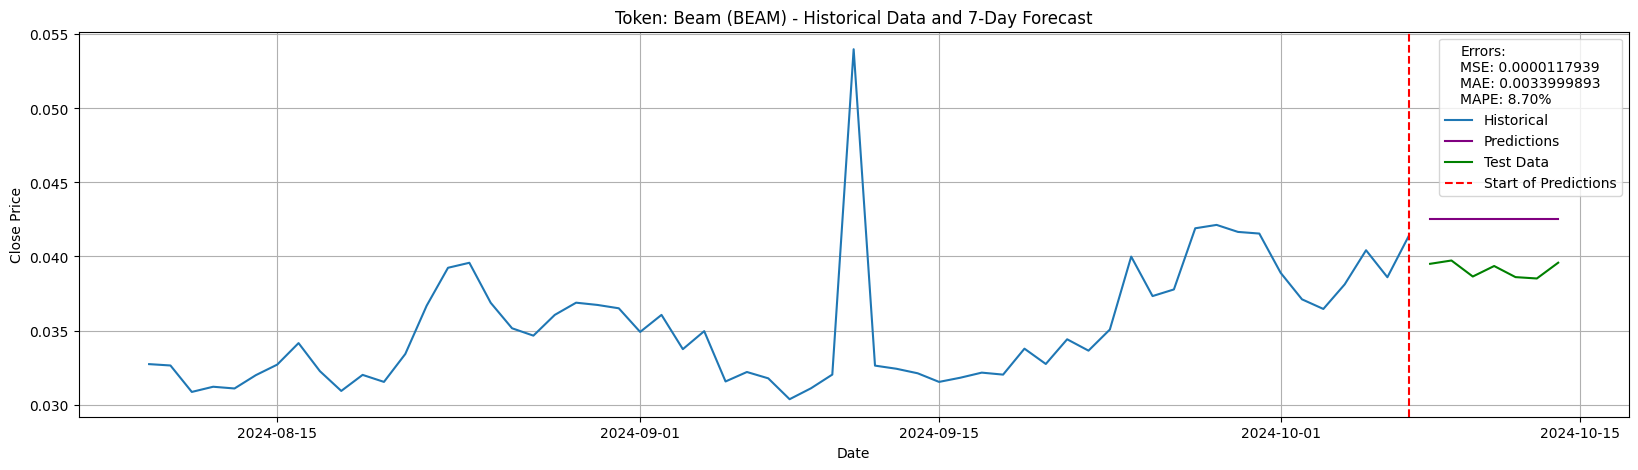

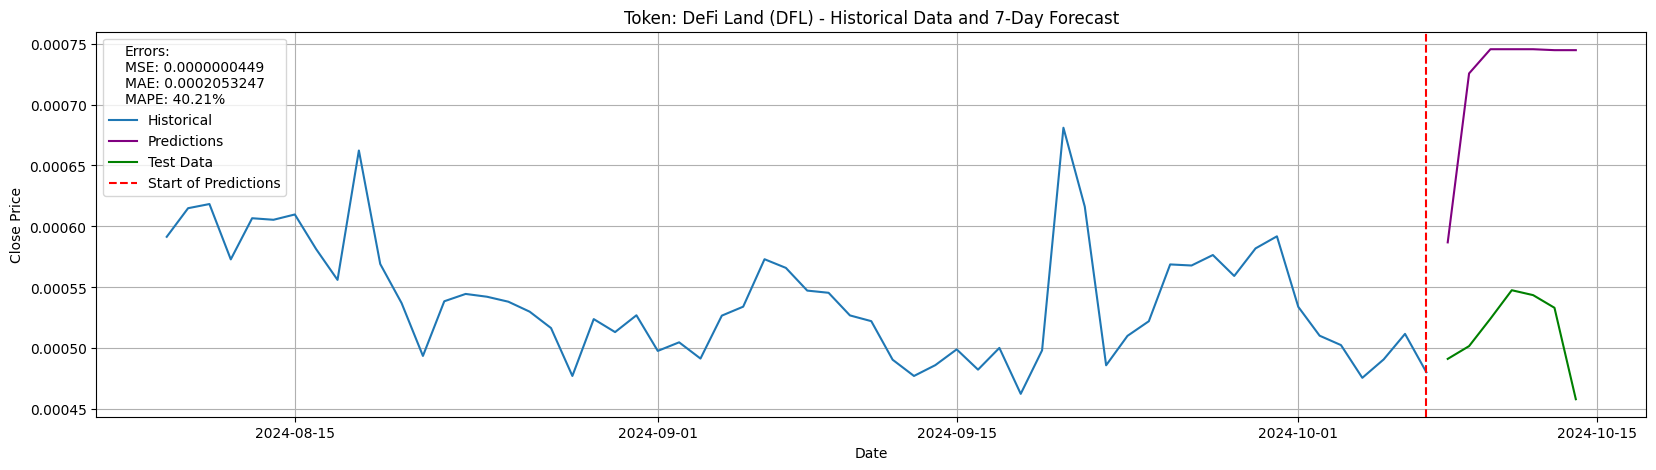

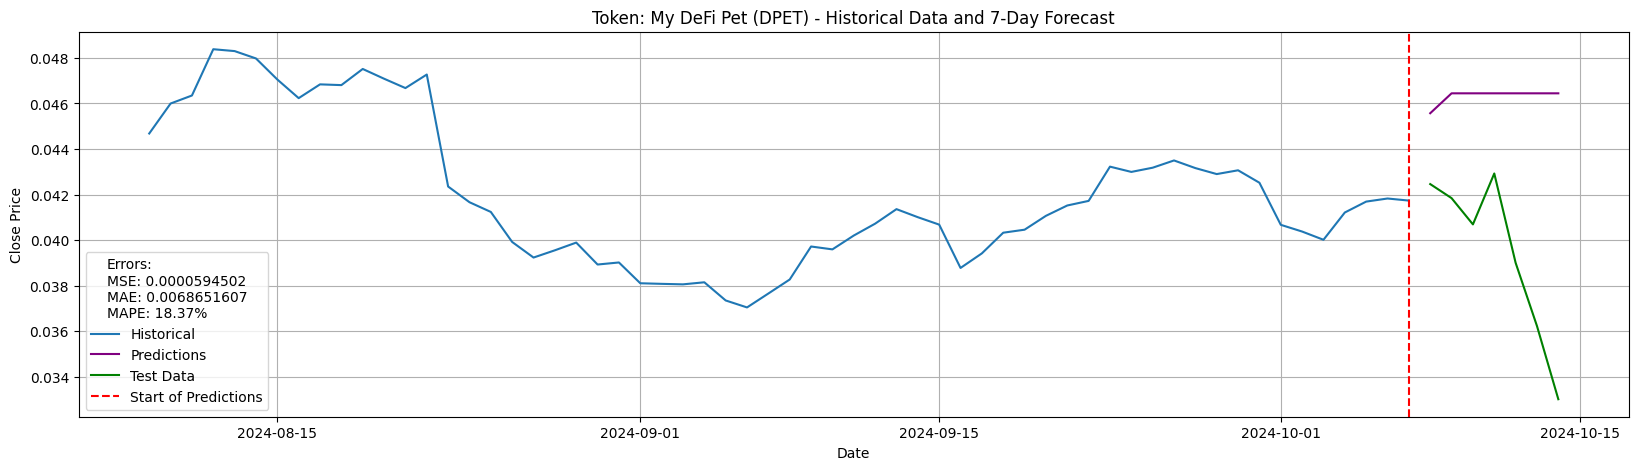

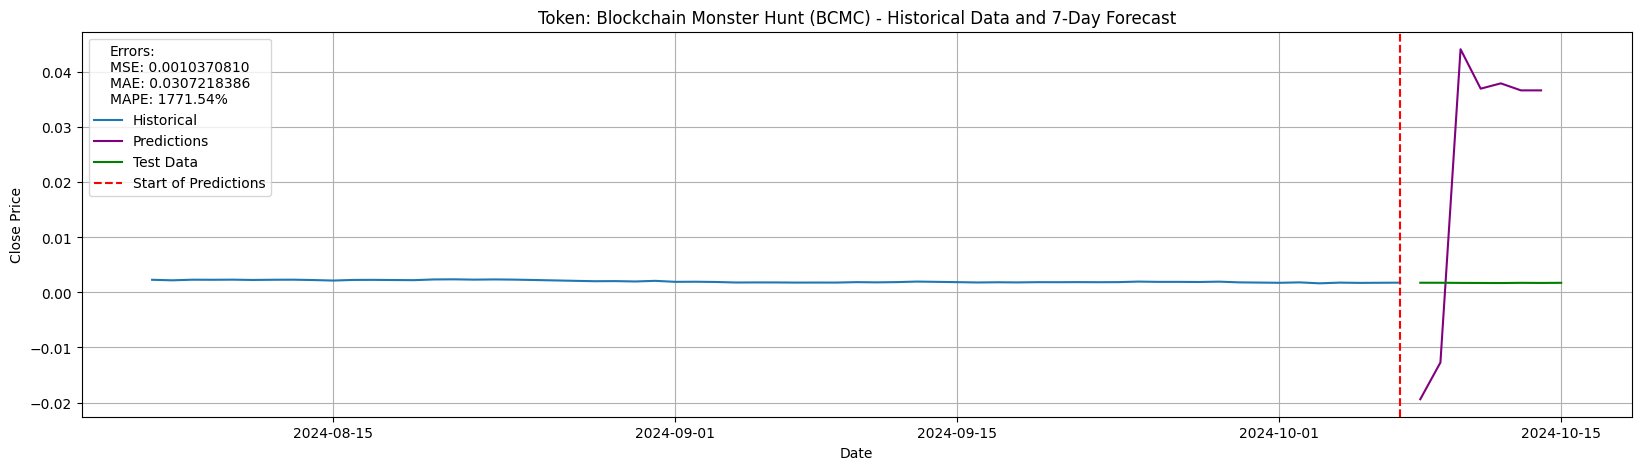

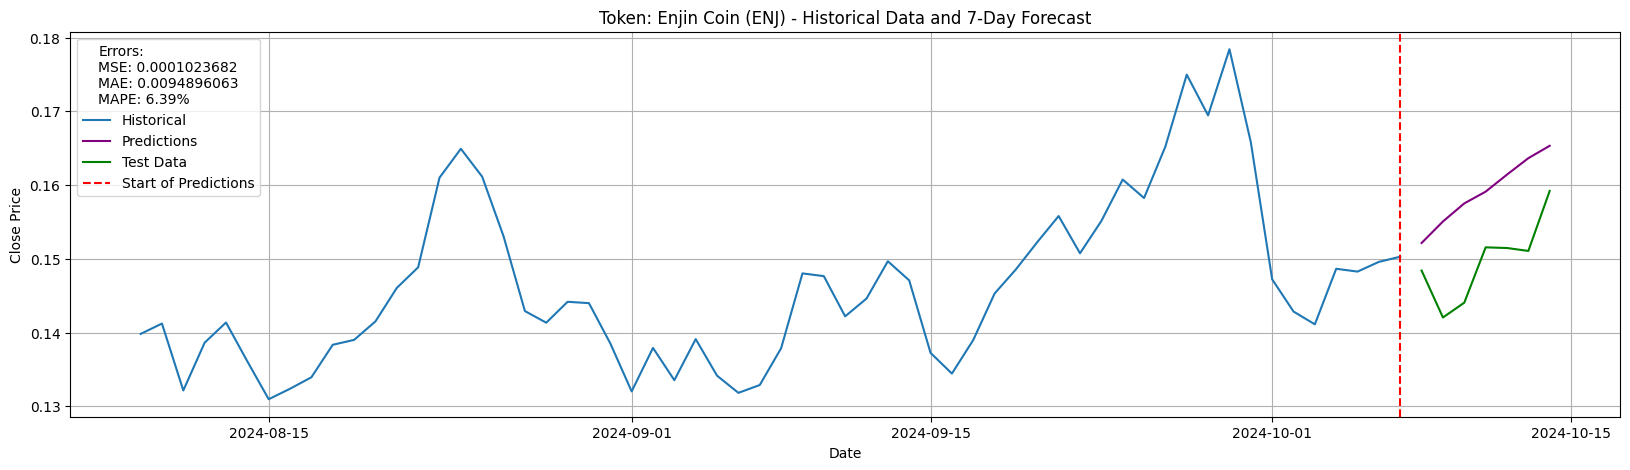

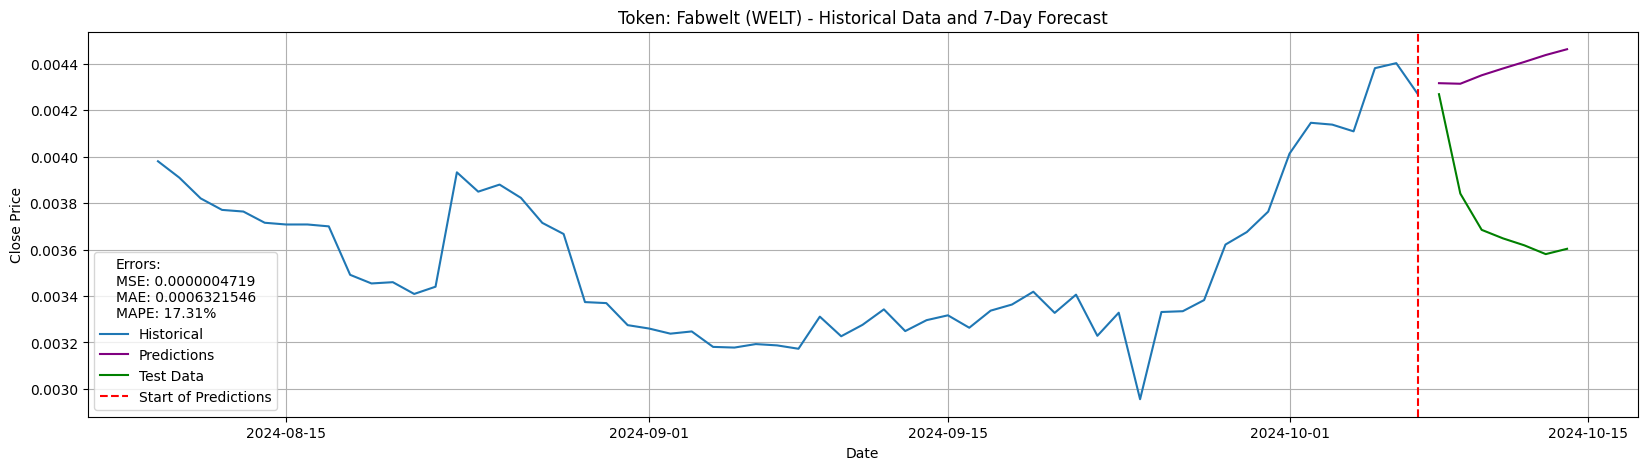

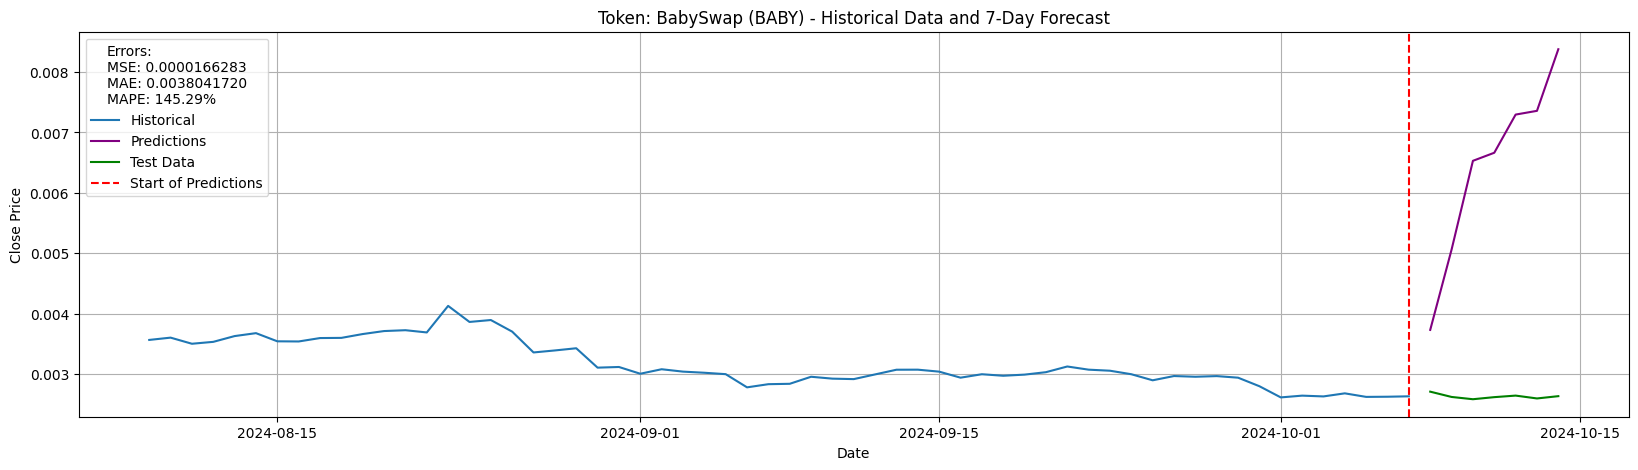

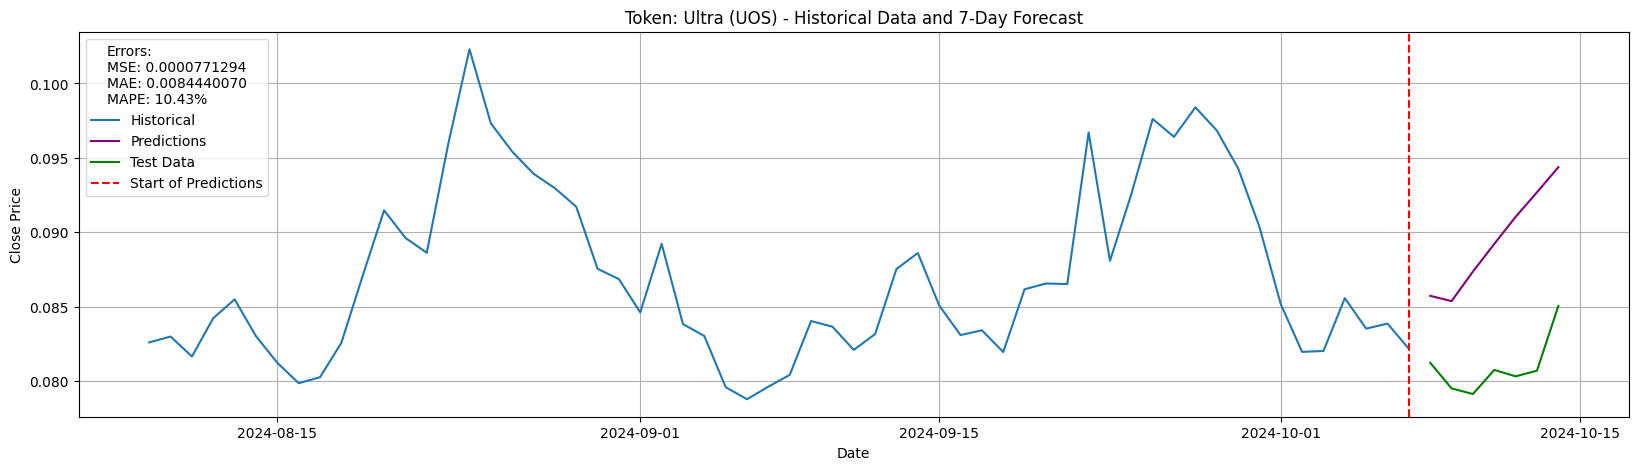

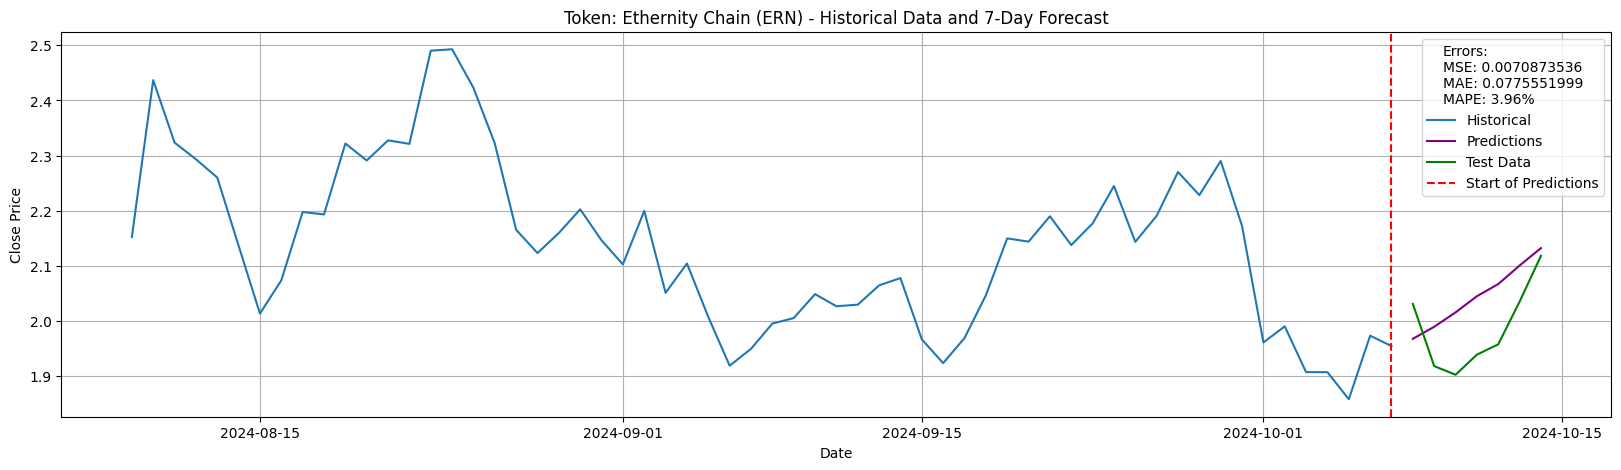

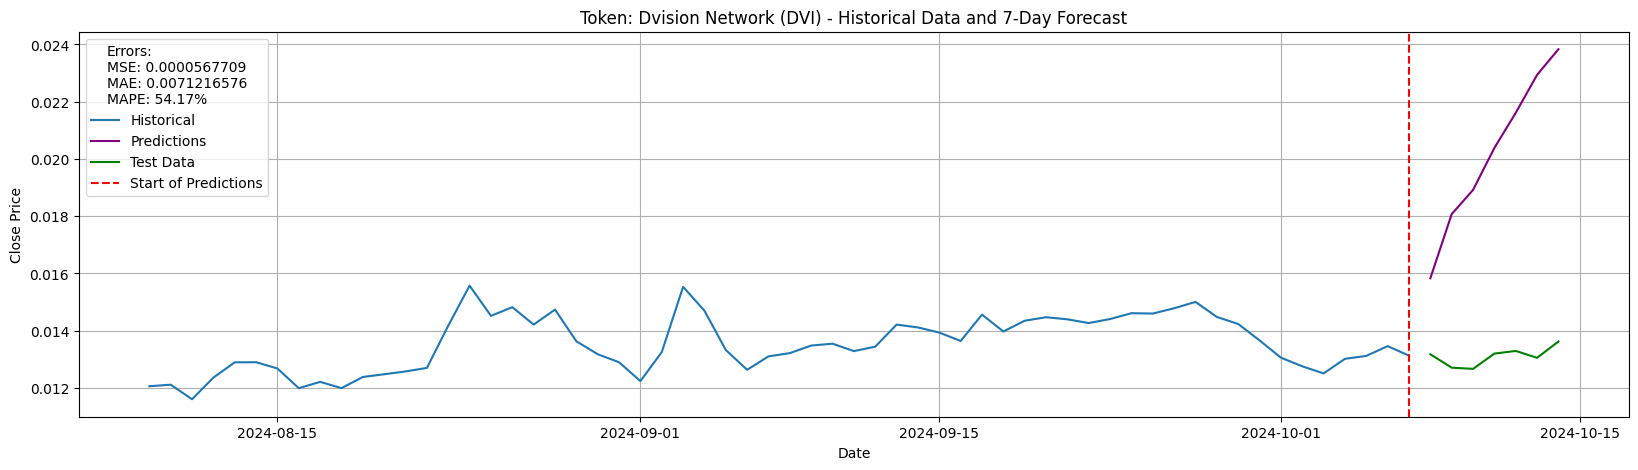

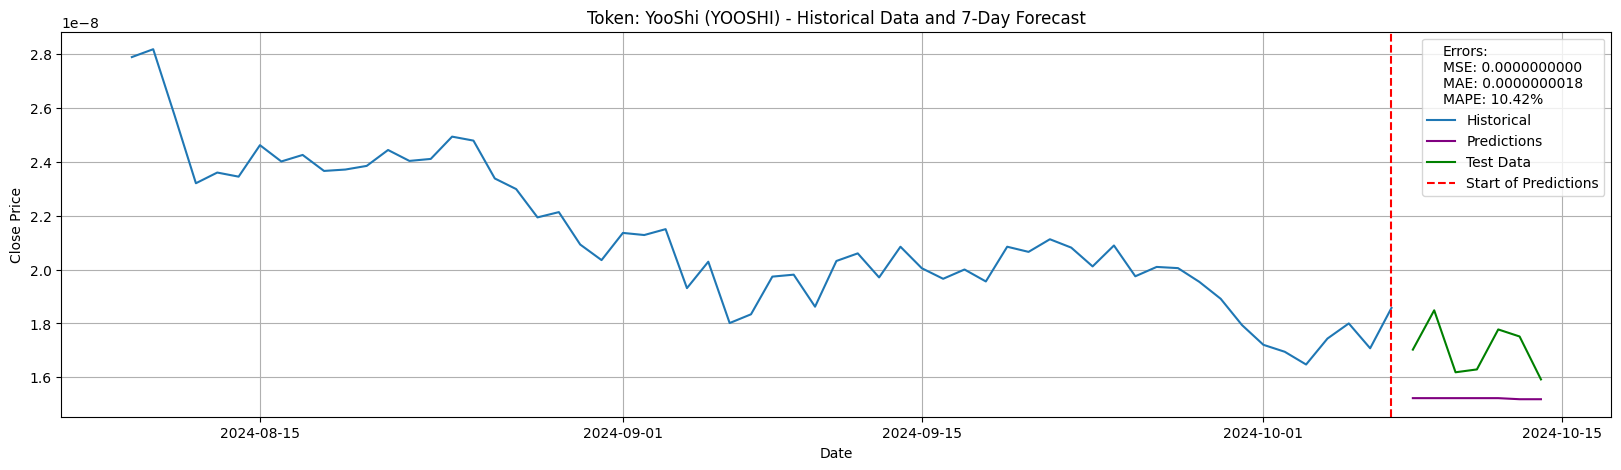

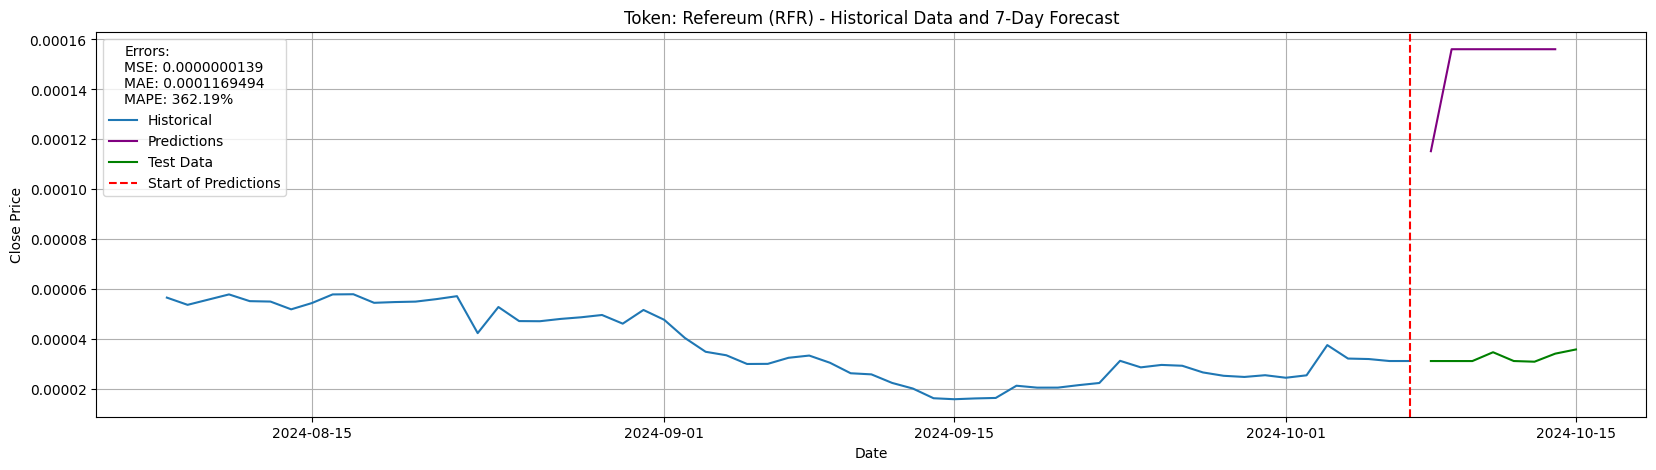

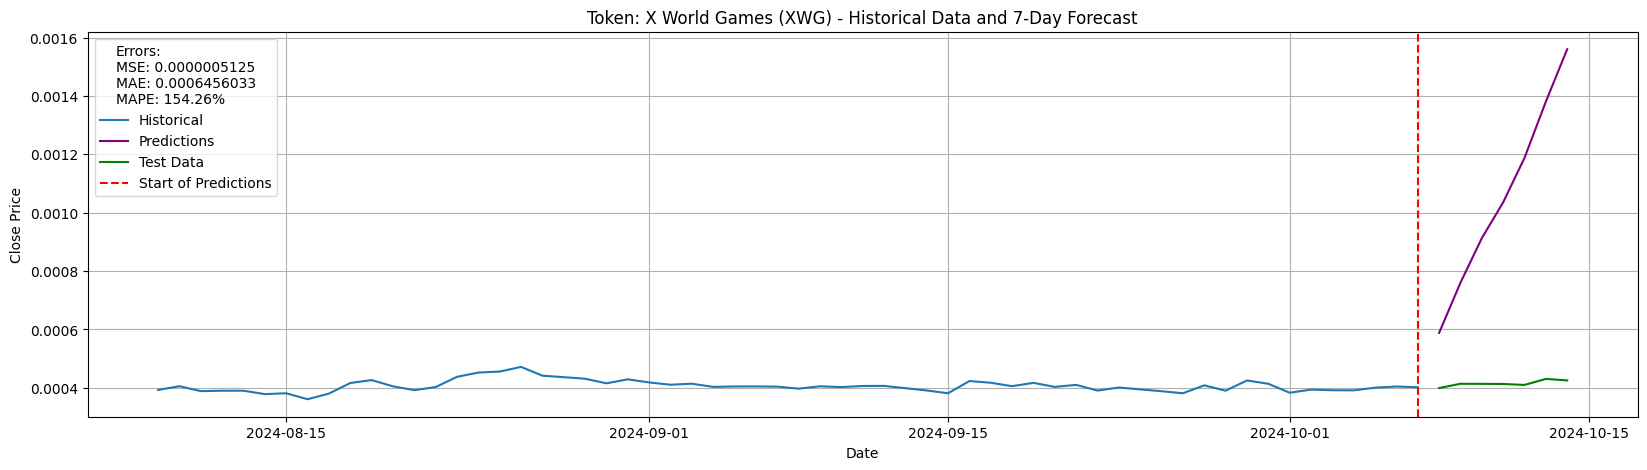

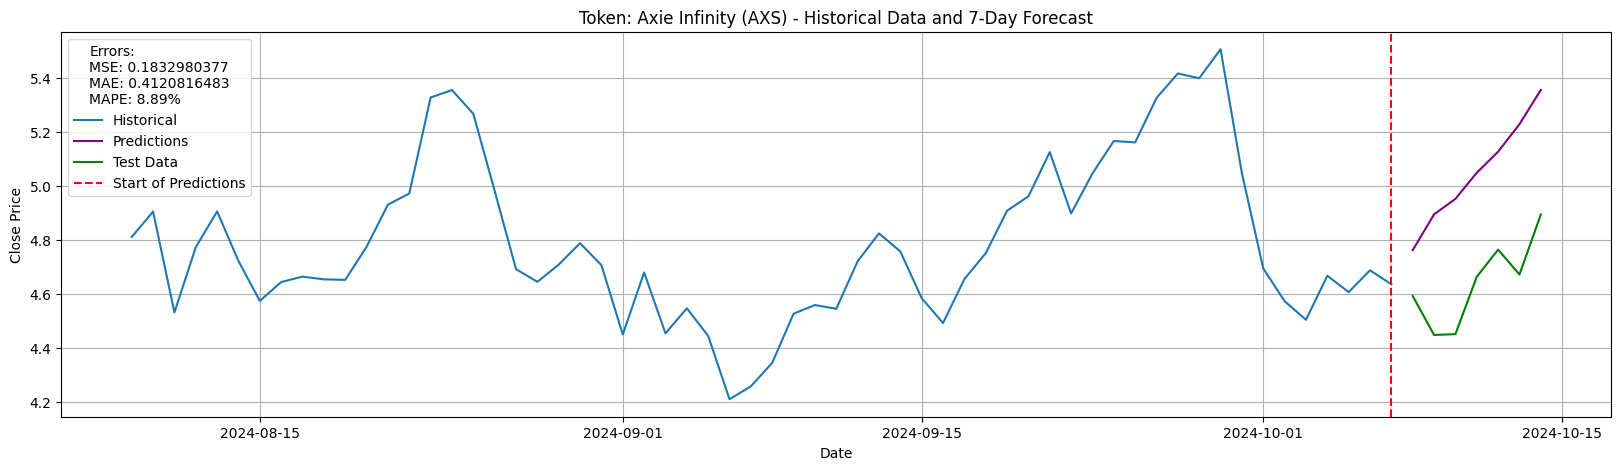

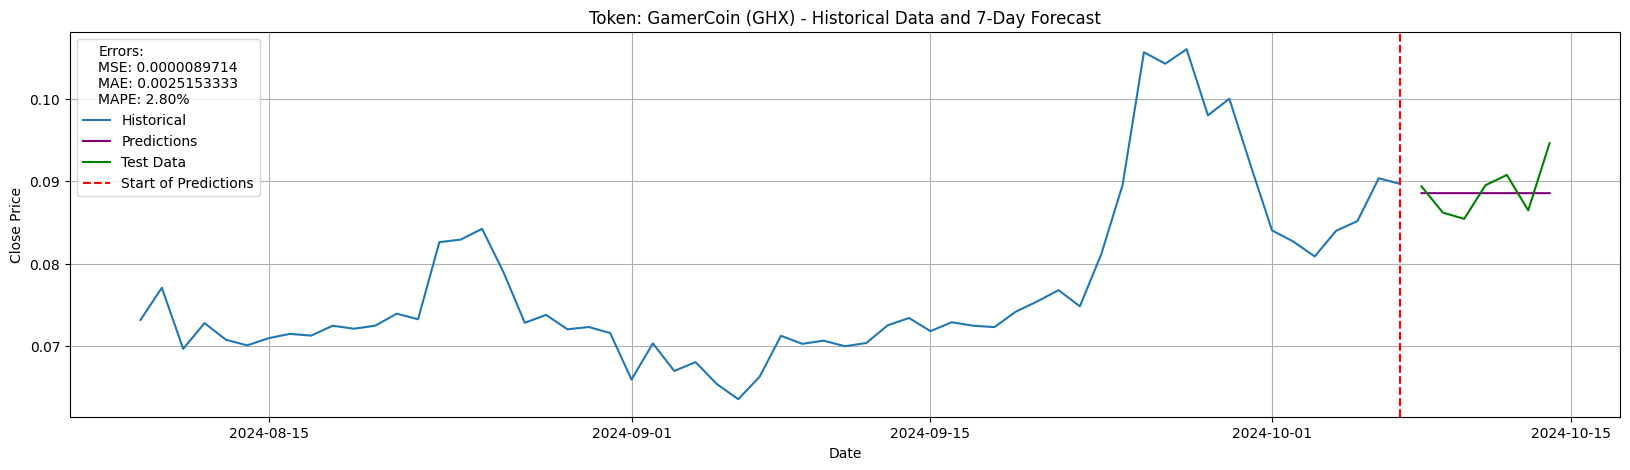

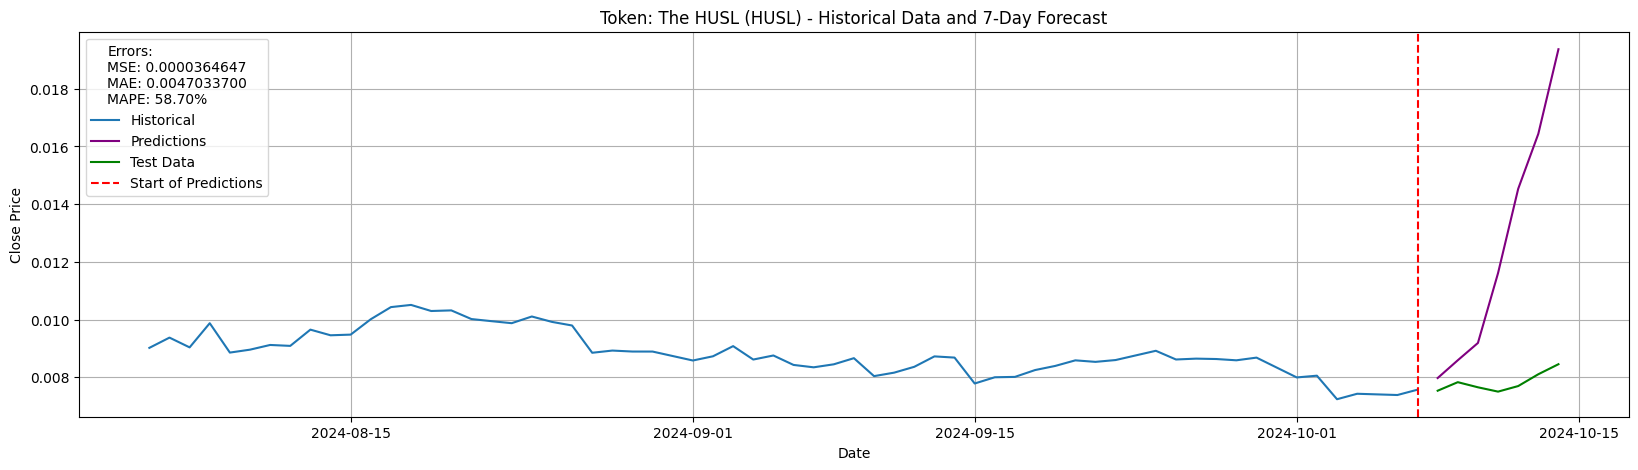

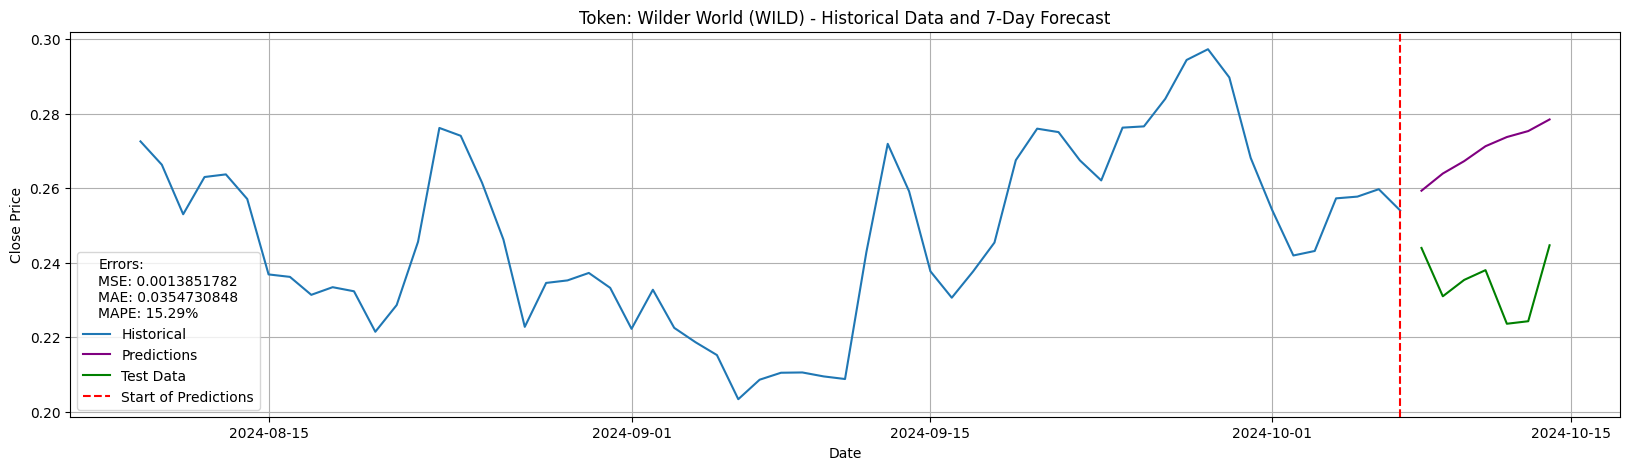

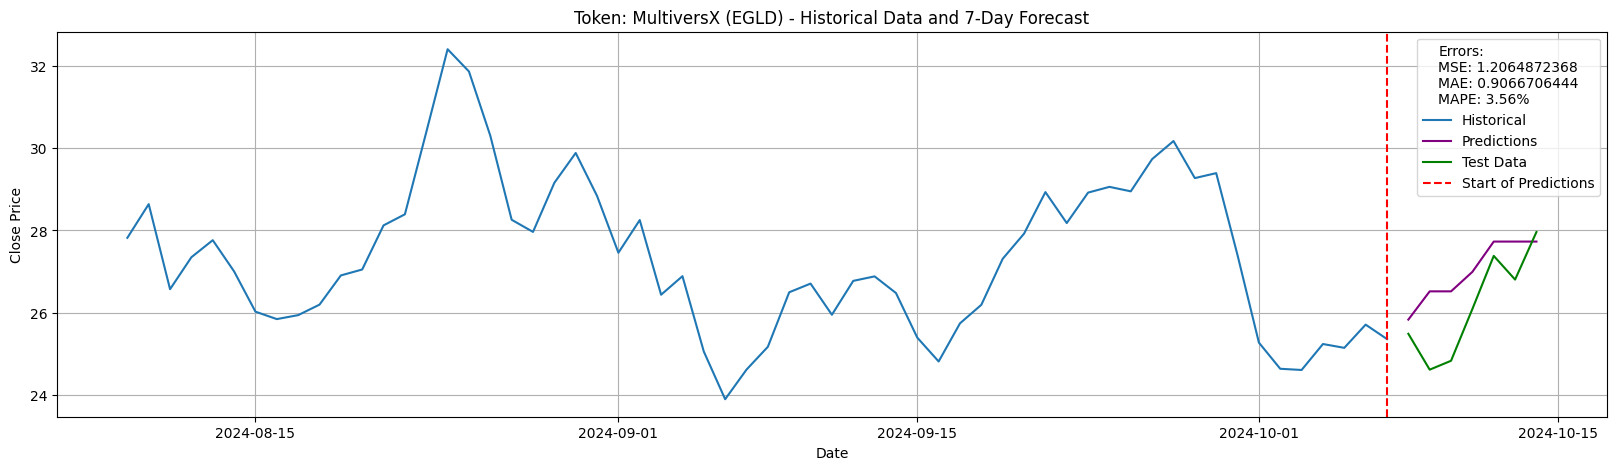

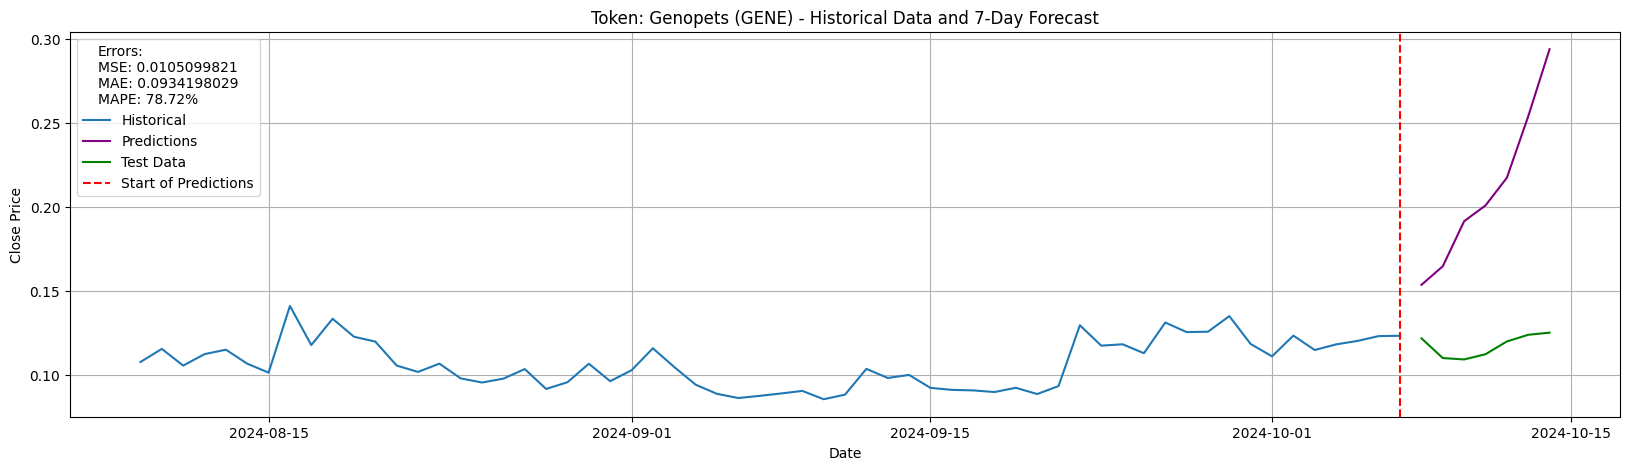

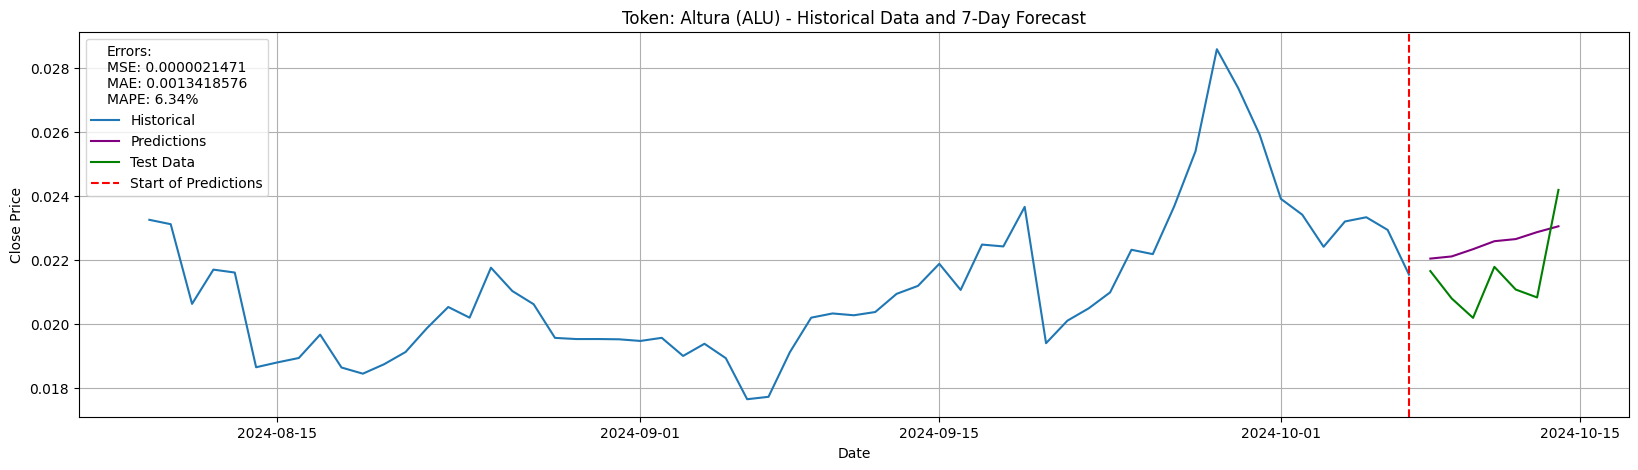

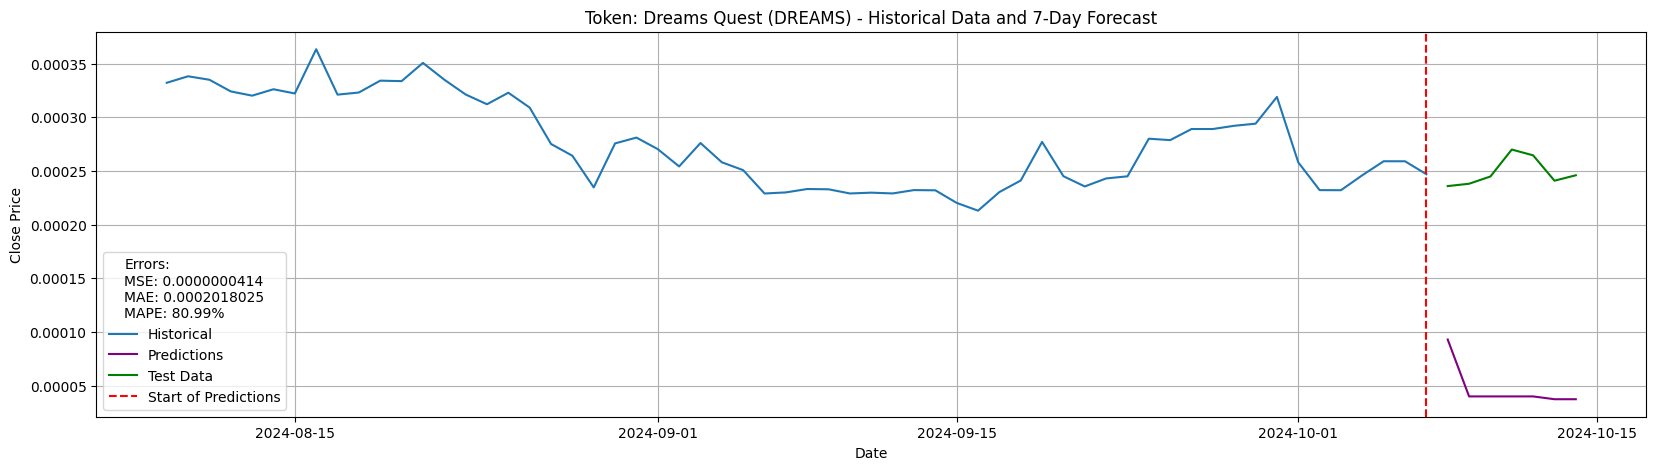

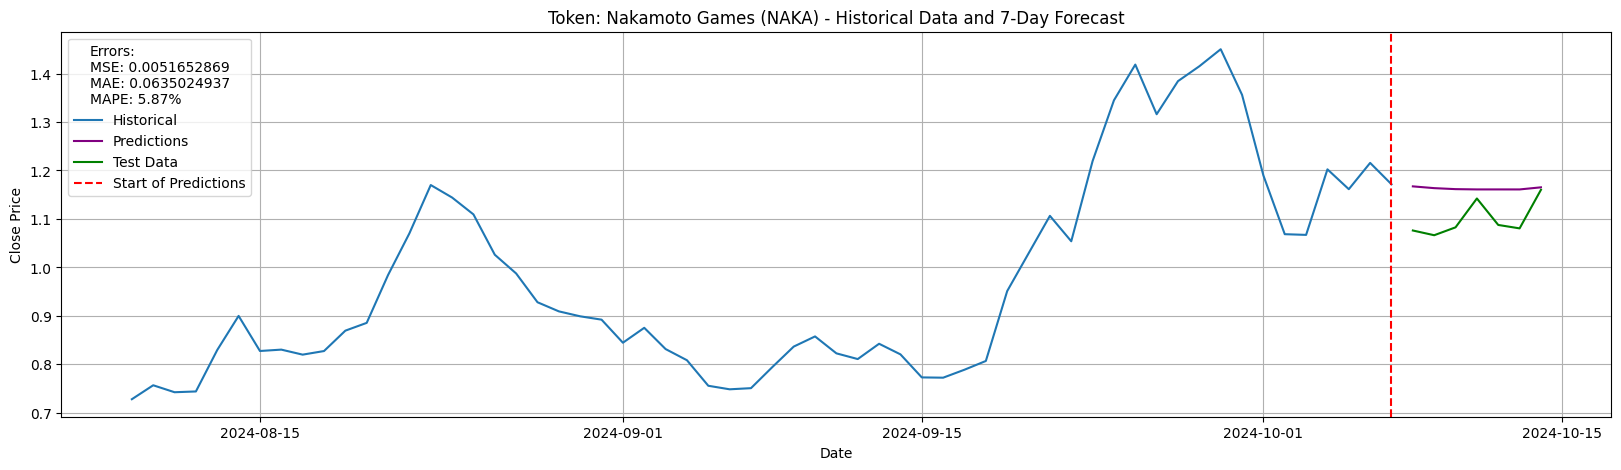

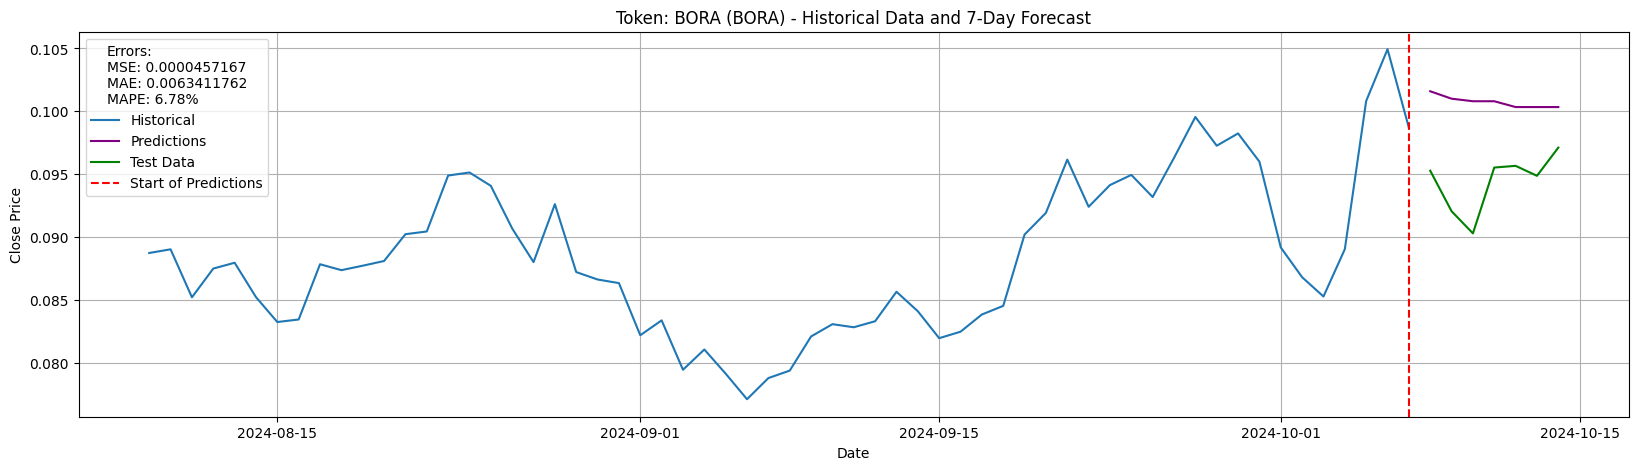

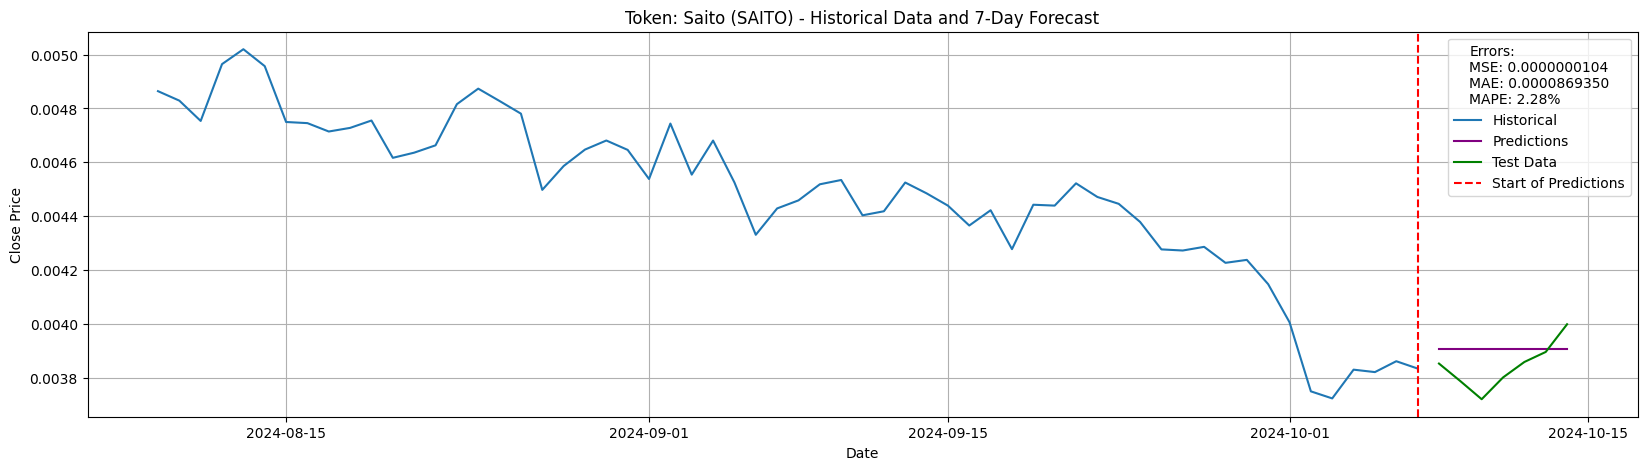

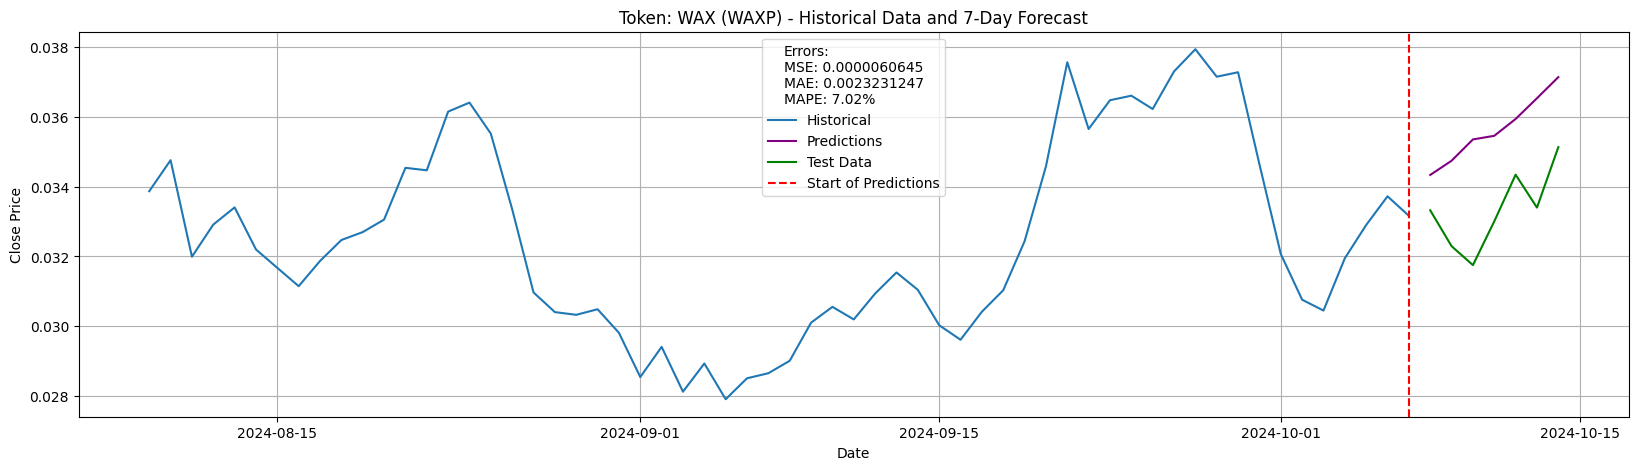

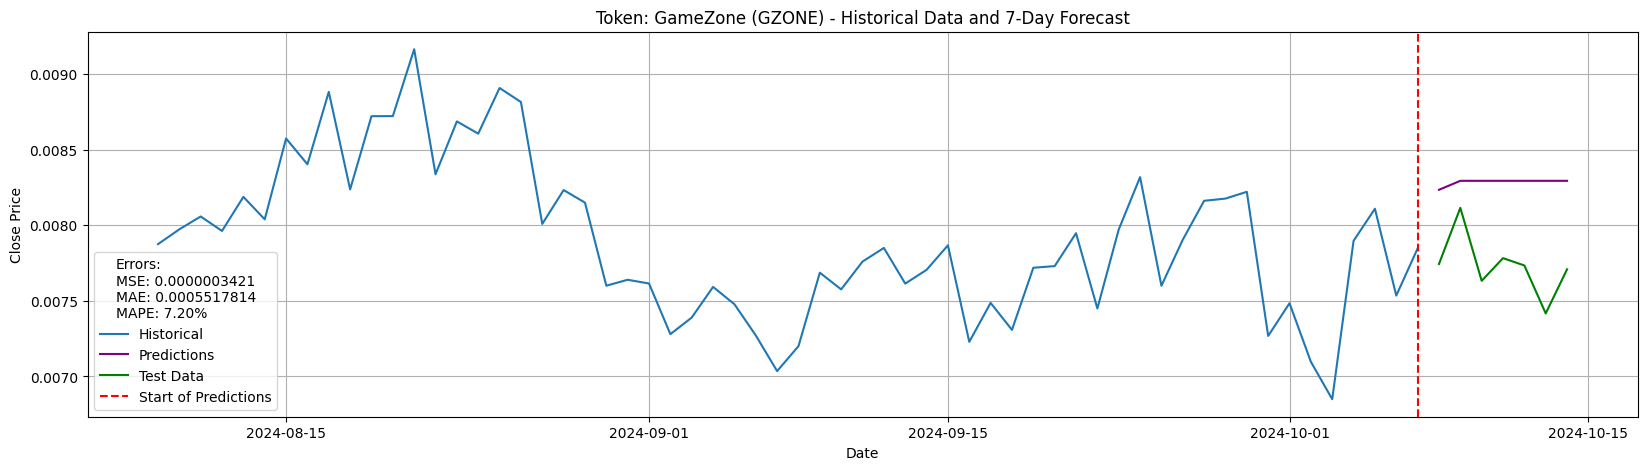

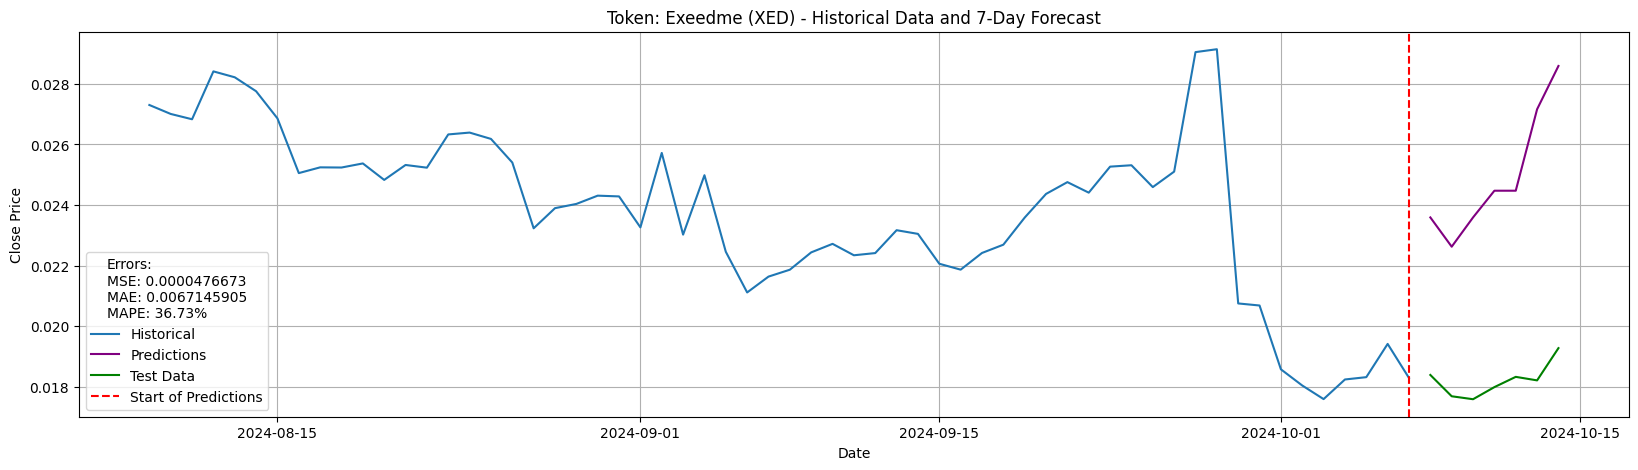

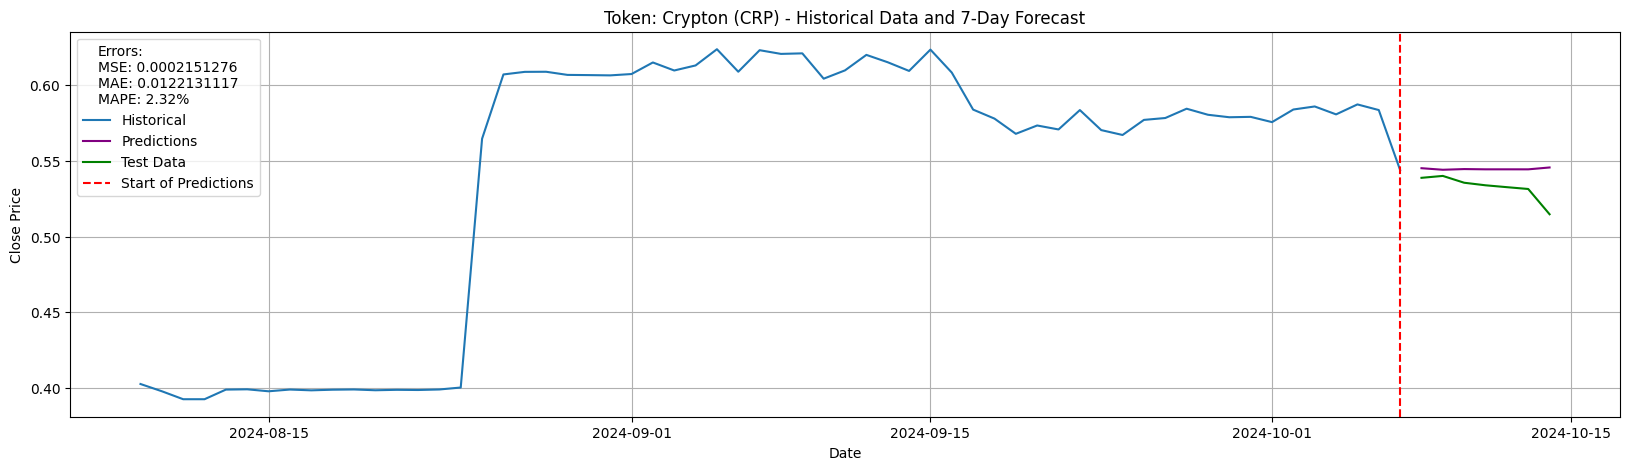

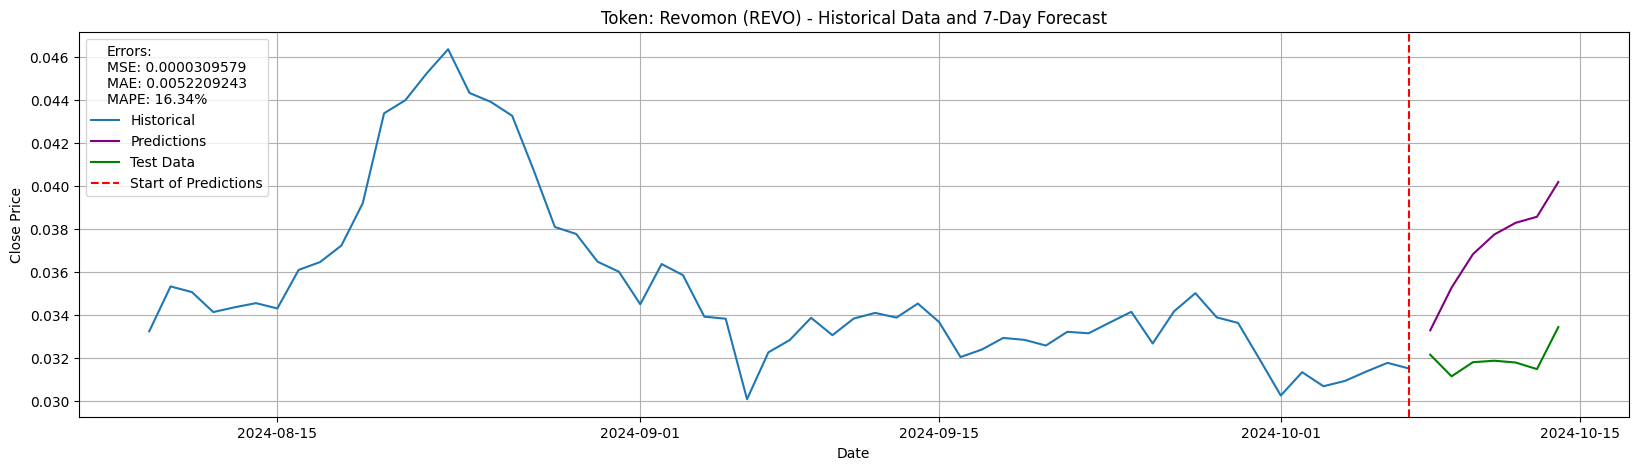

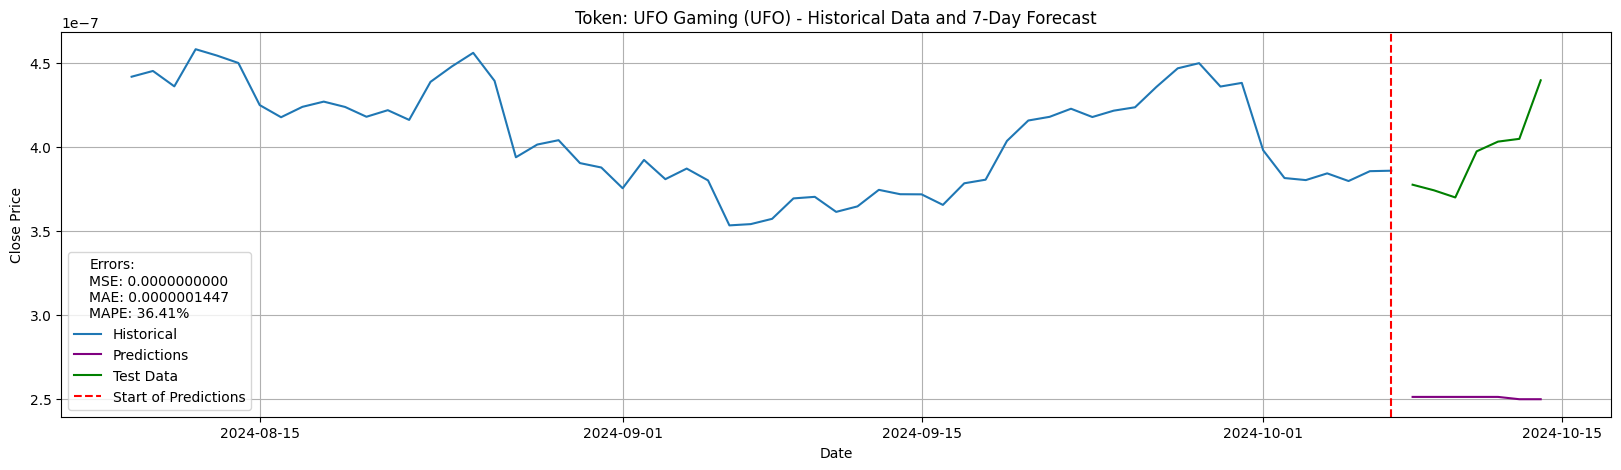

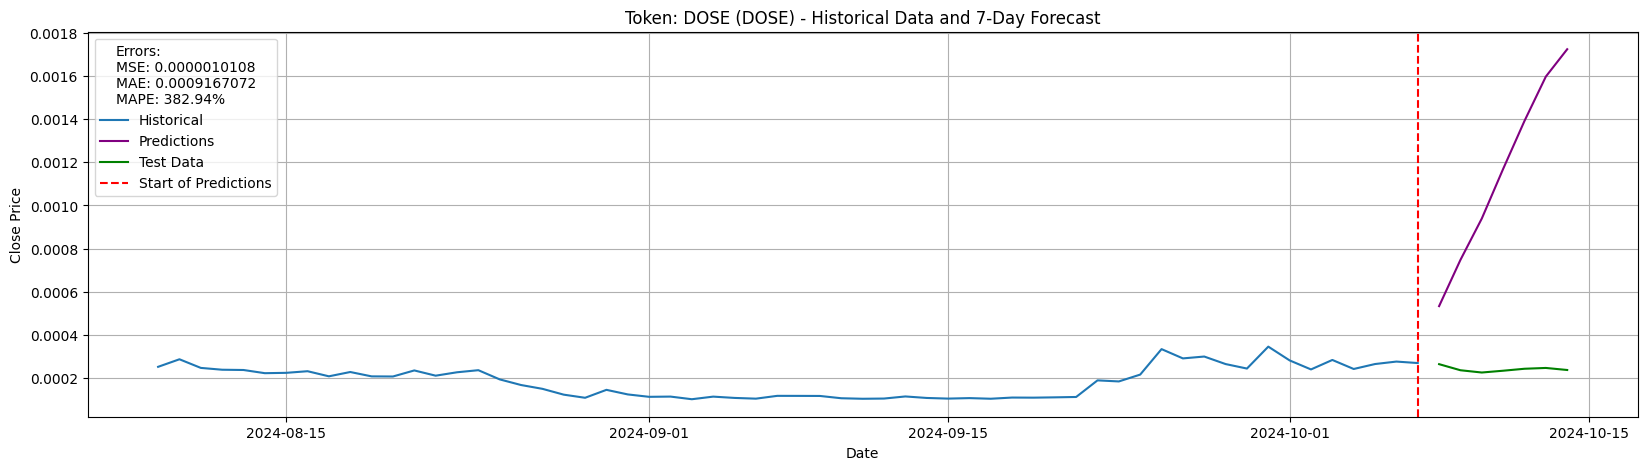

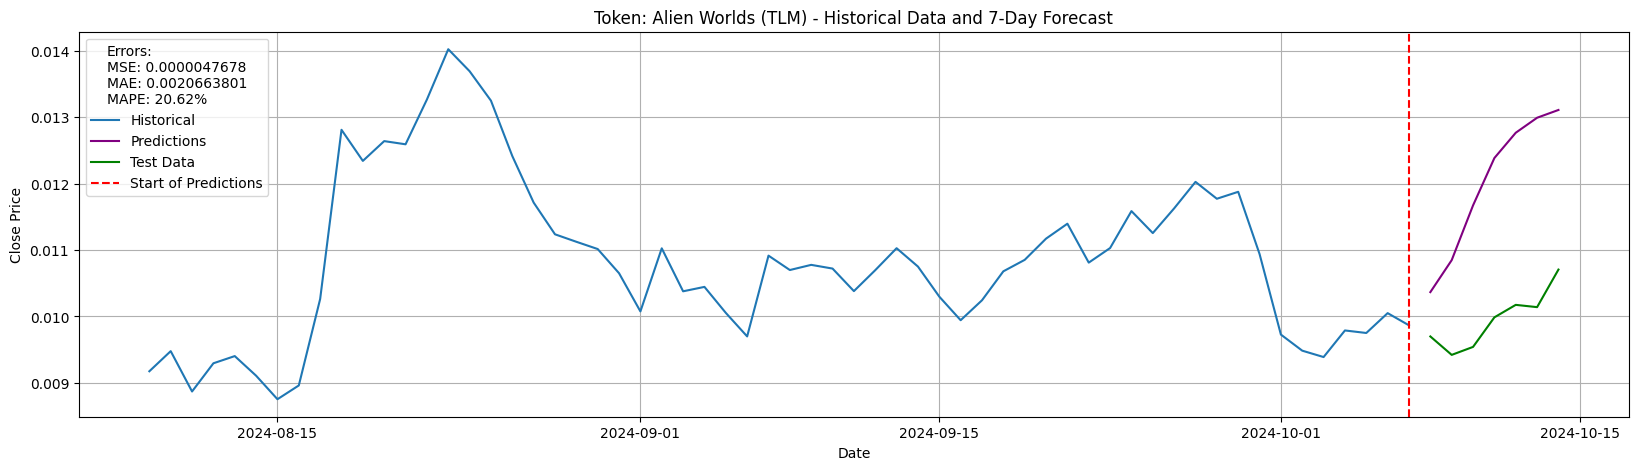

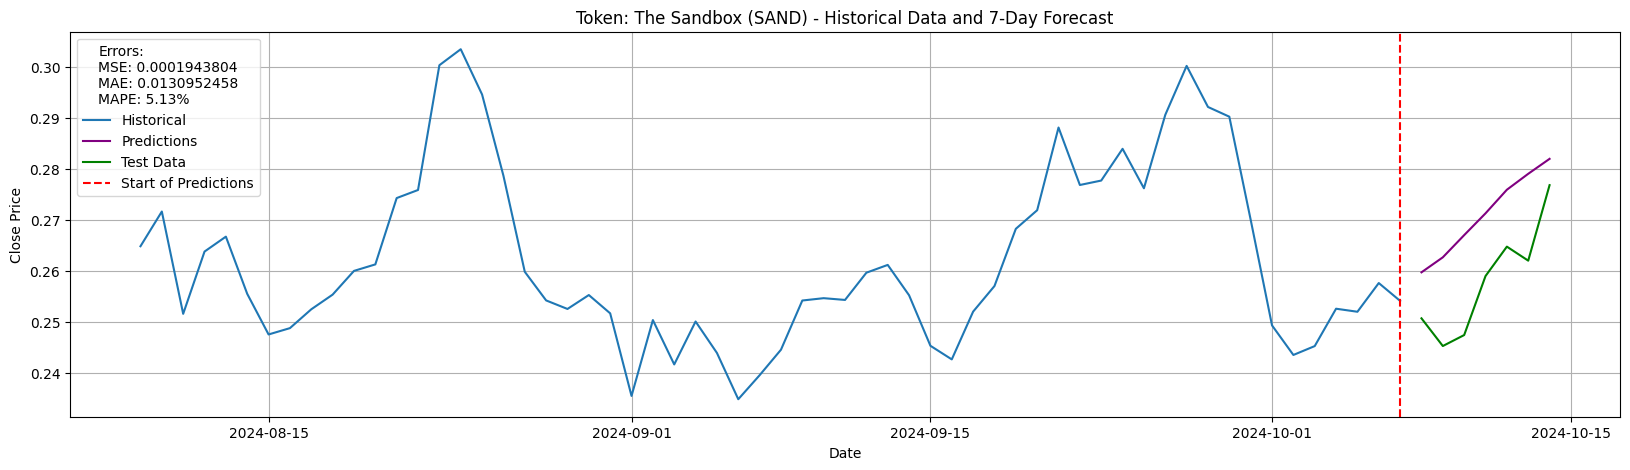

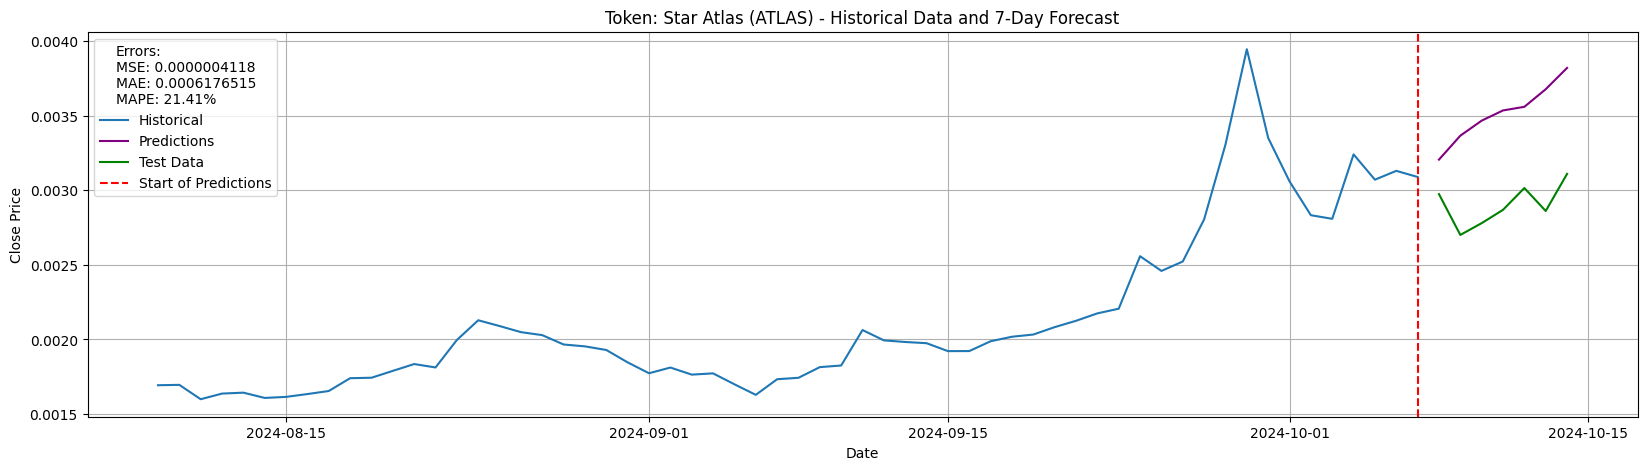

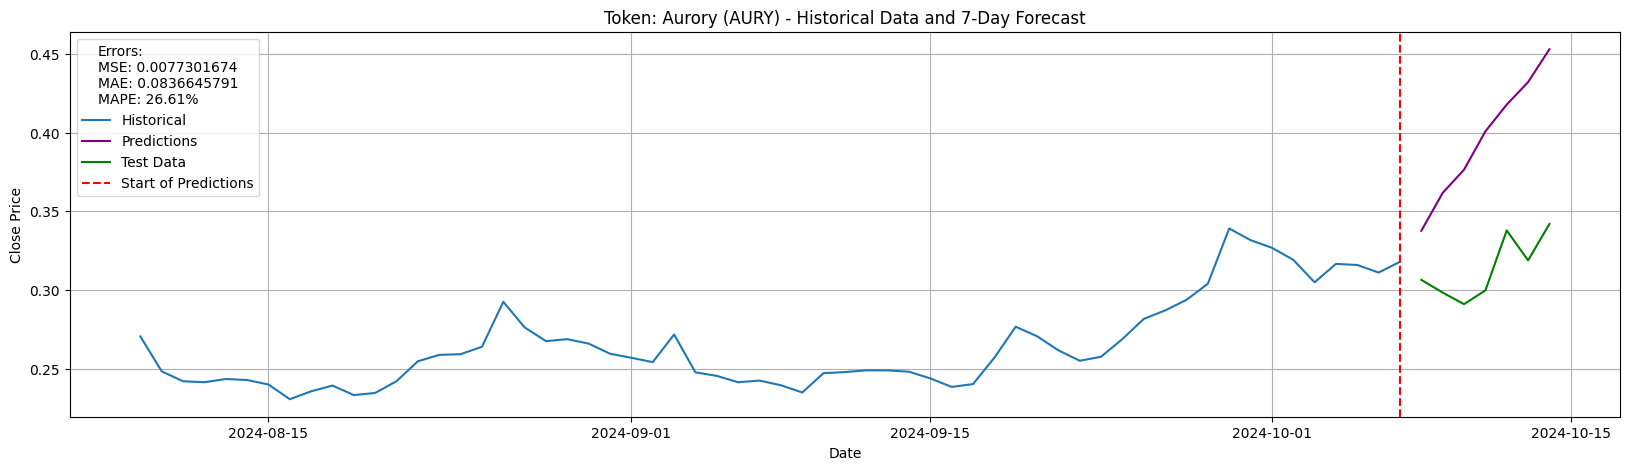

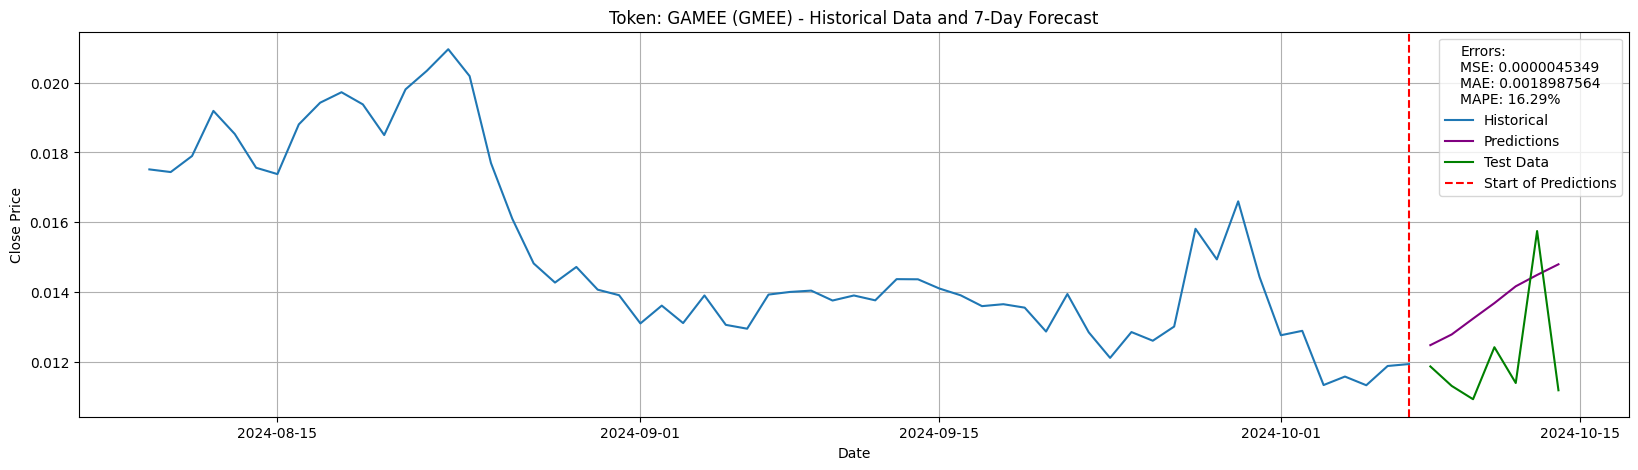

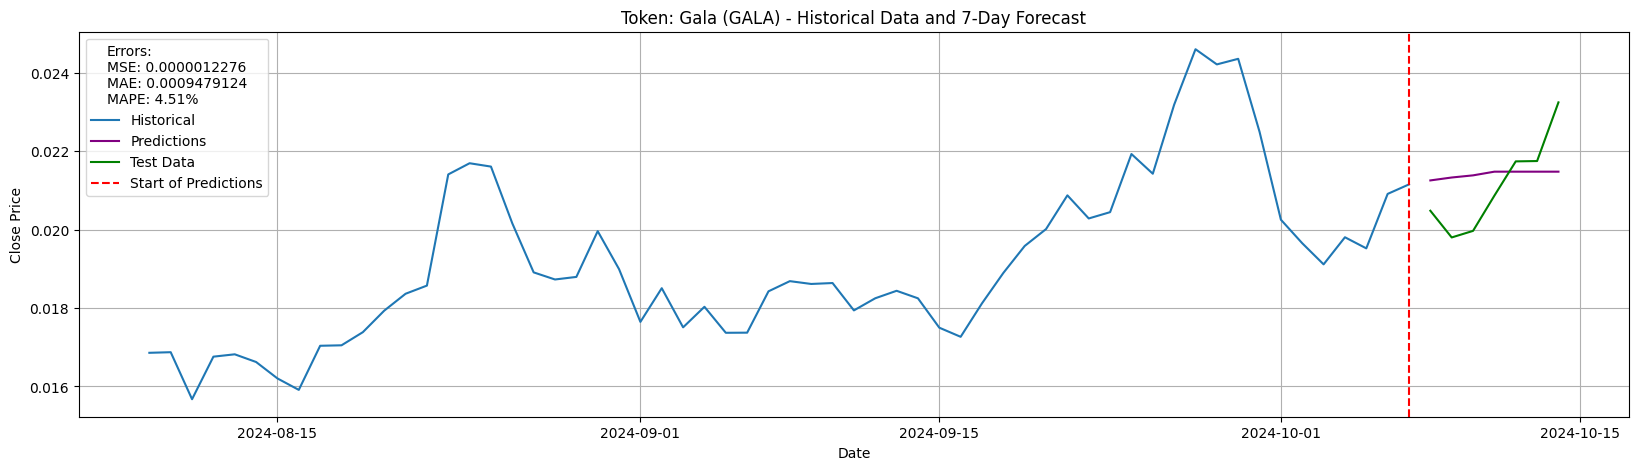

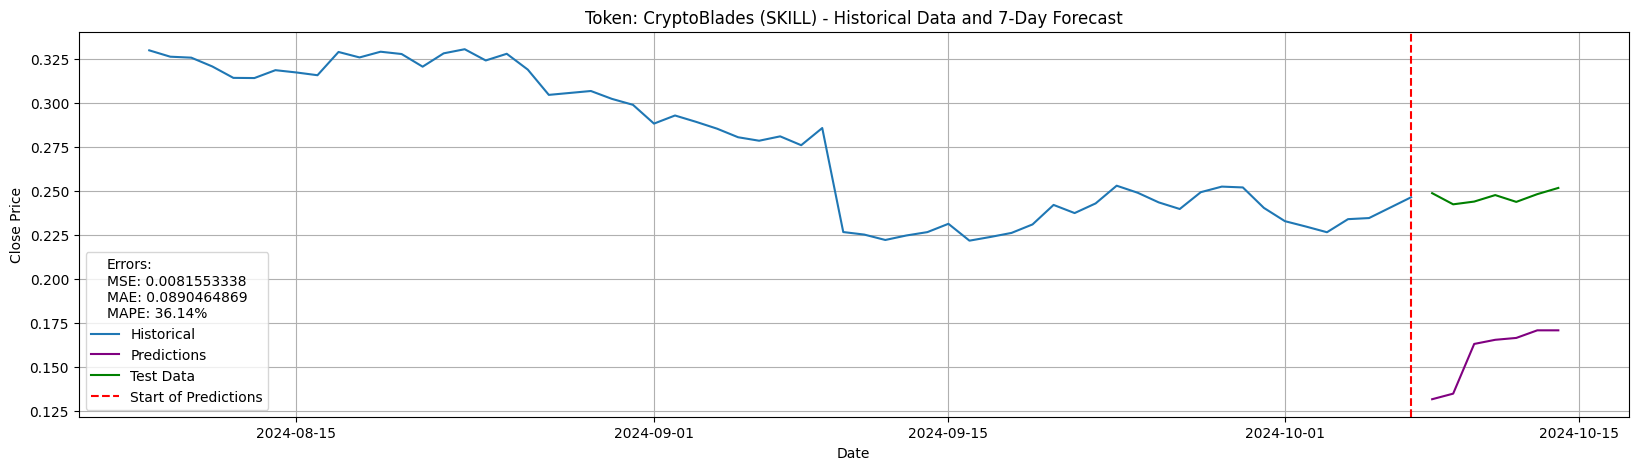

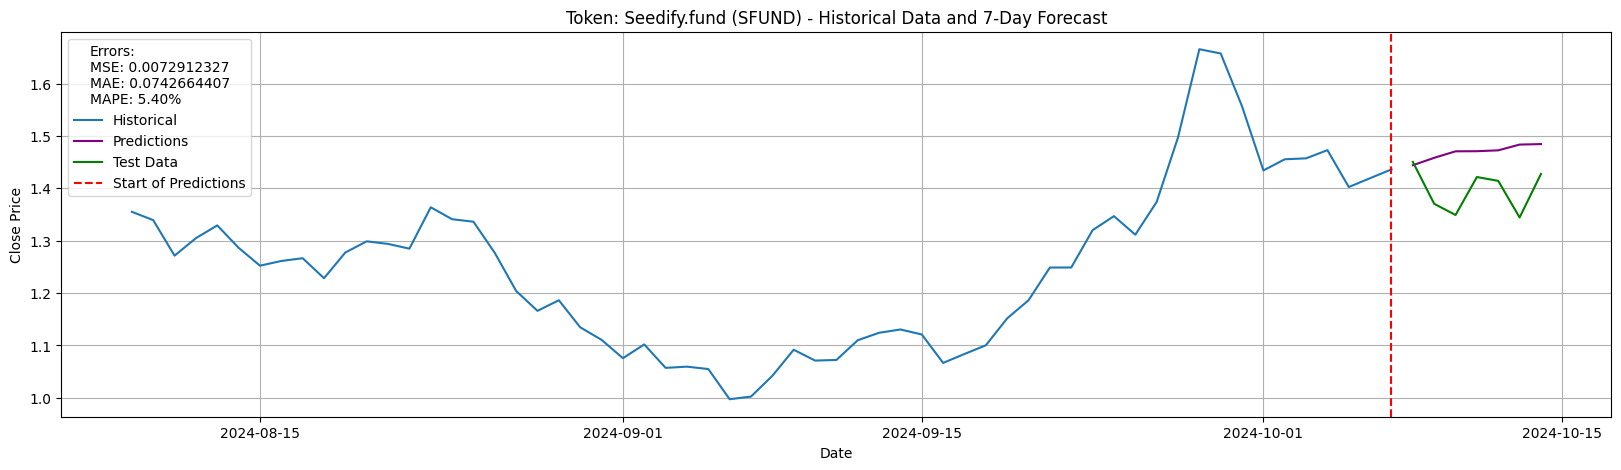

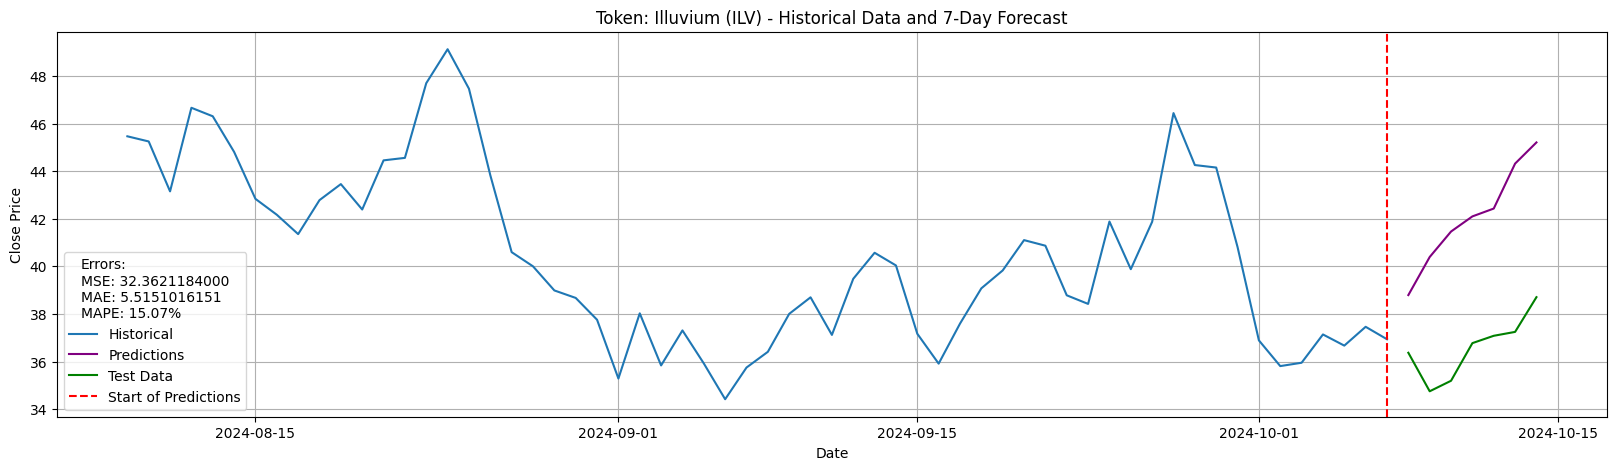

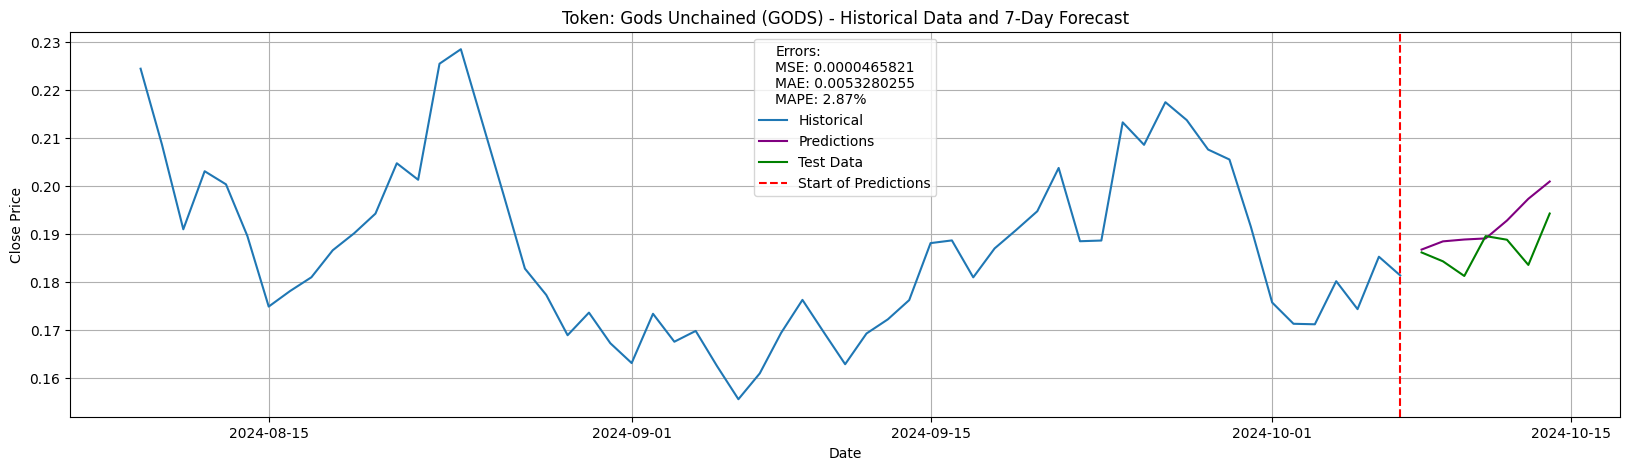

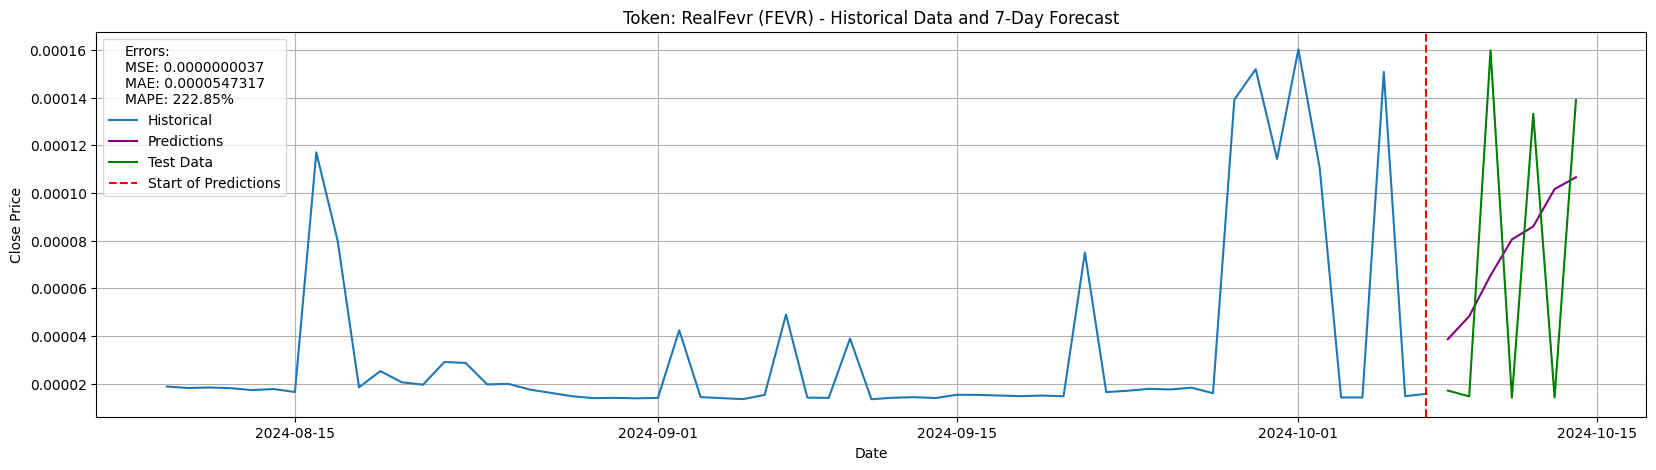

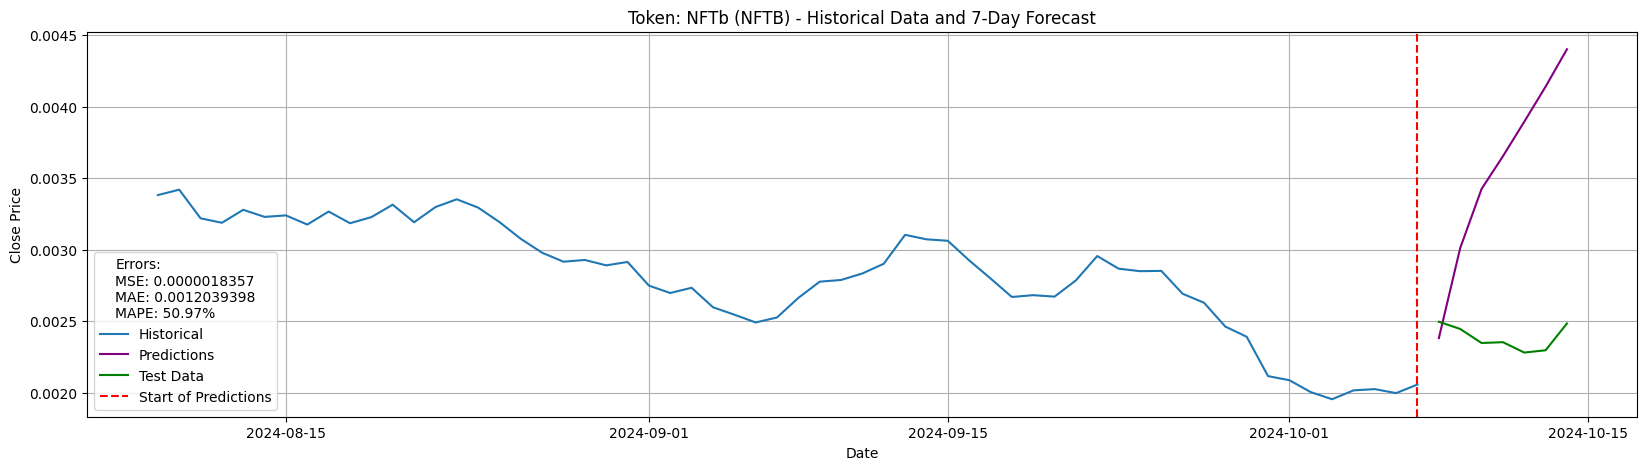

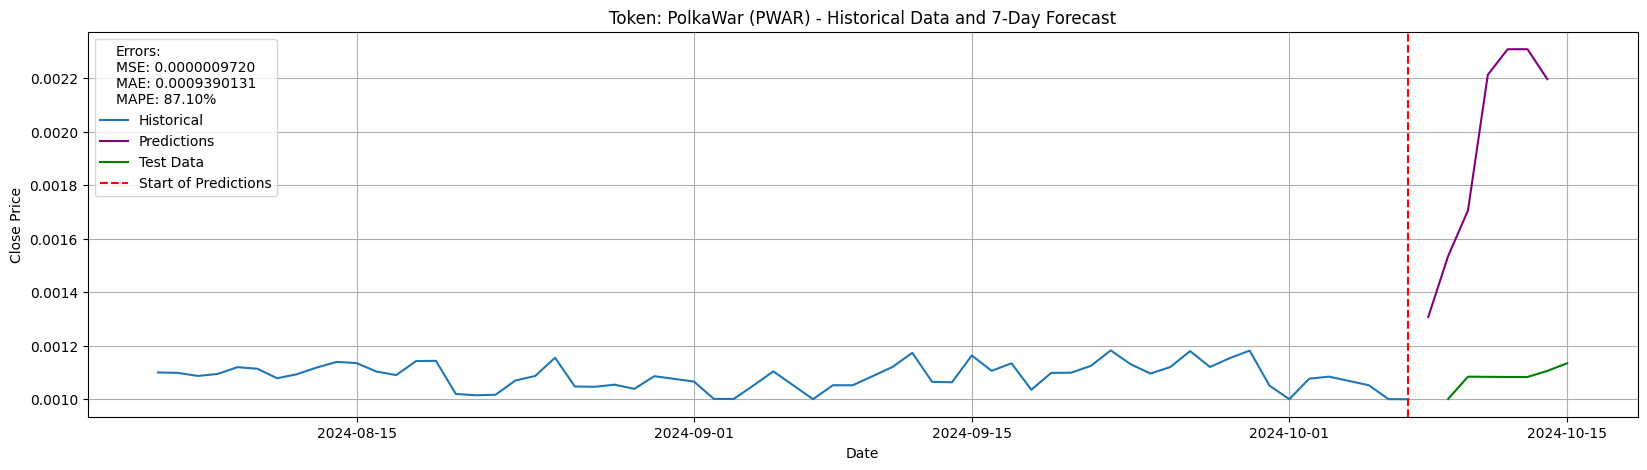

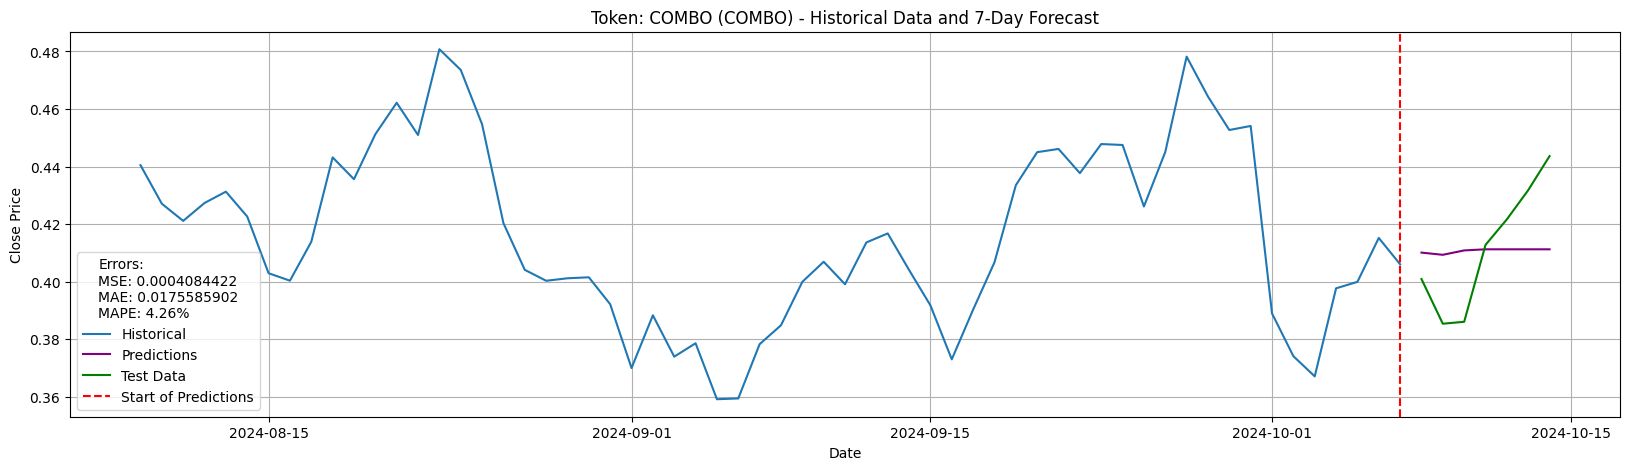

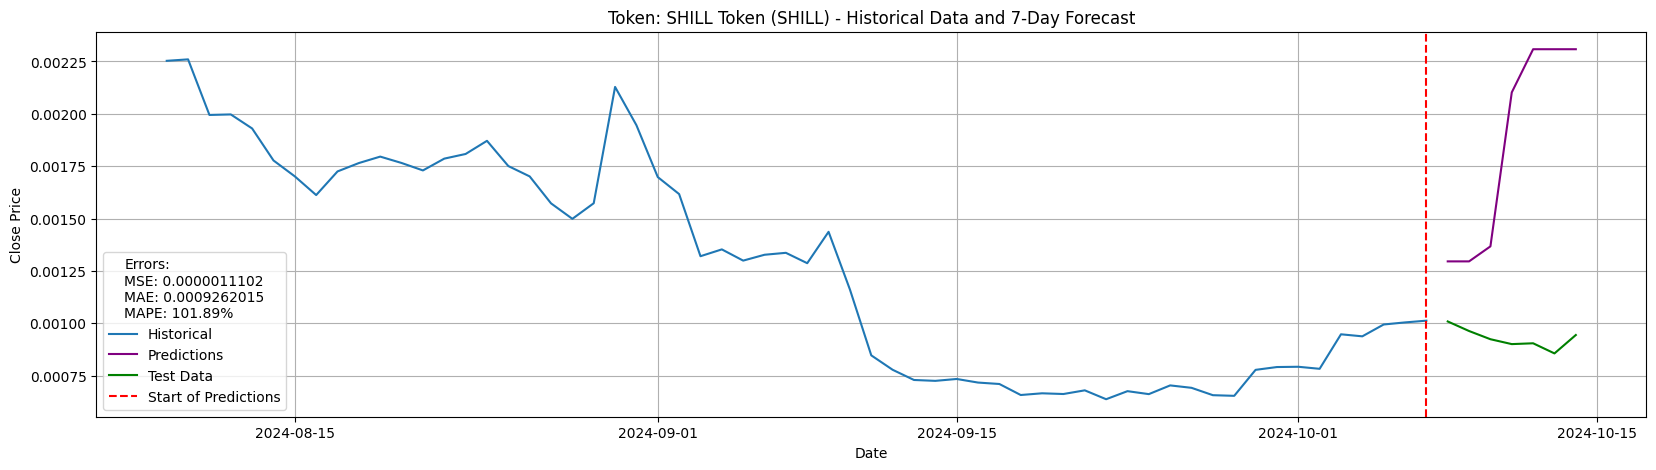

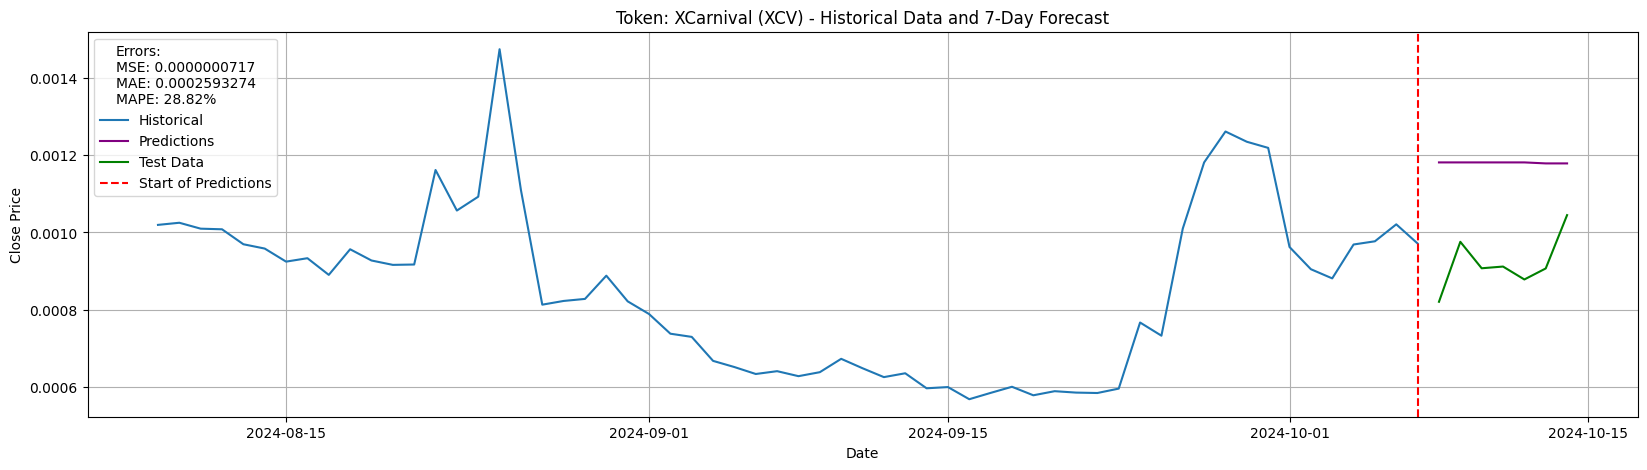

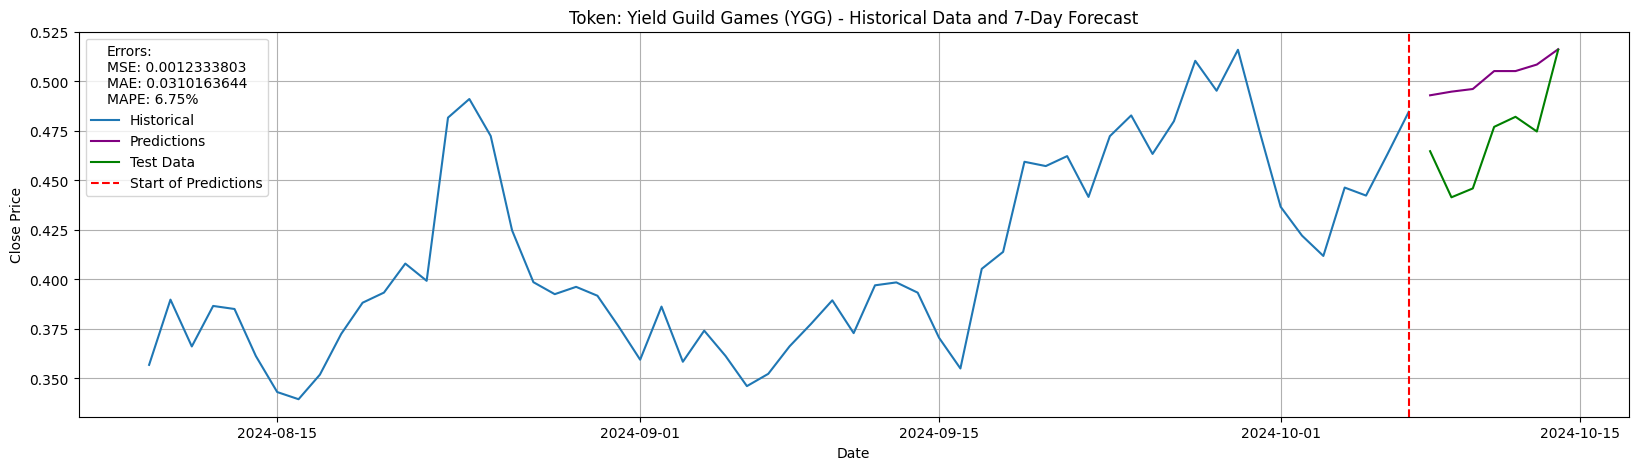

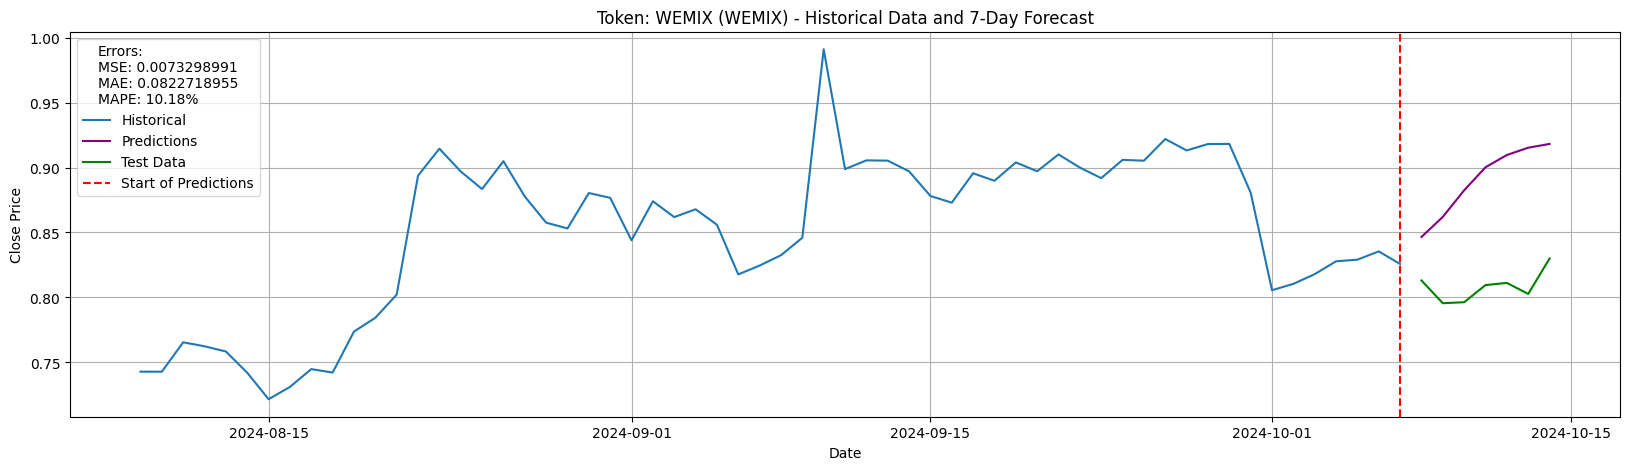

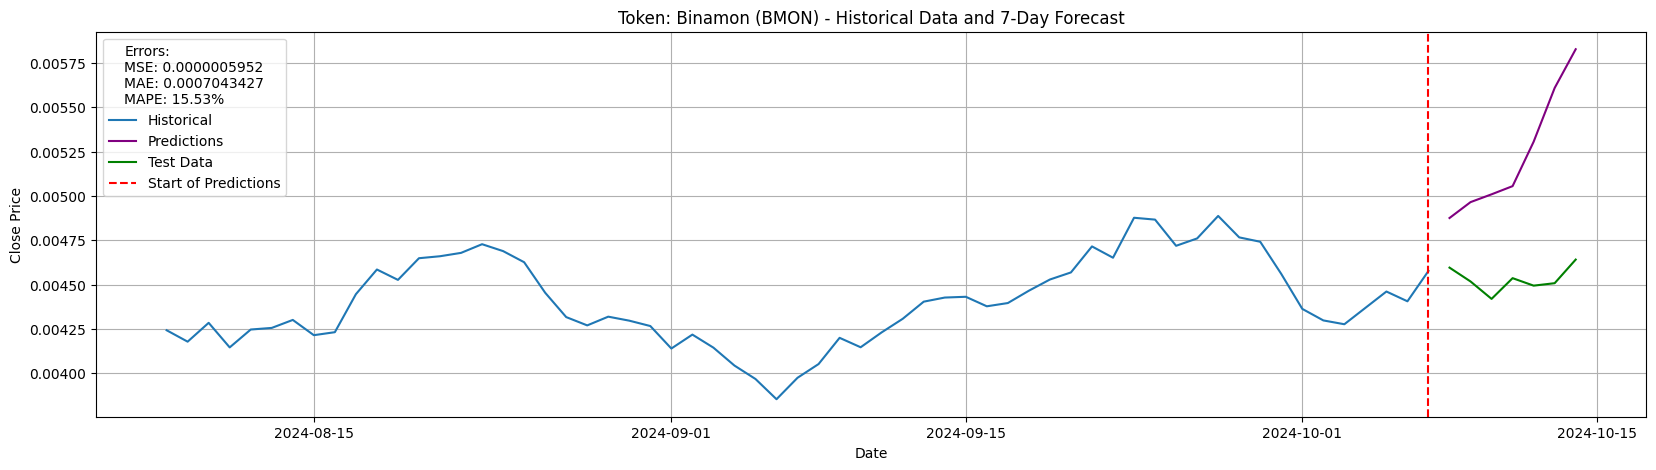

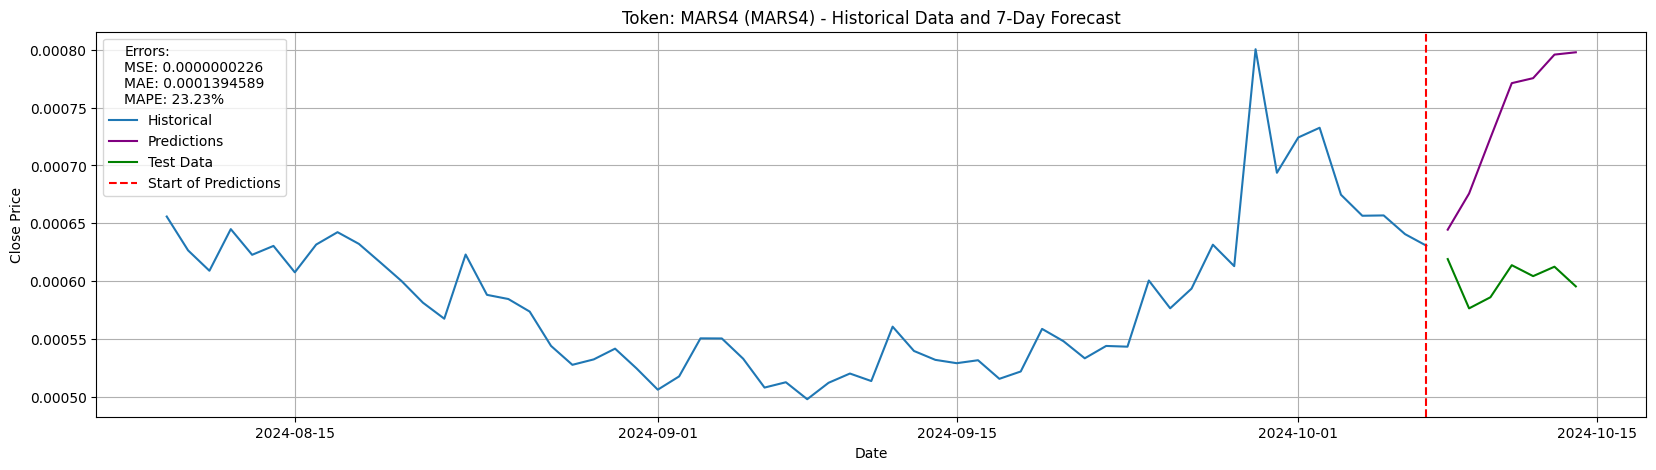

In [43]:
u.plot_predictions(train_data=gaming_obj.og_train, predictions_x_days=gaming_obj.og_pred, test_data=gaming_obj.og_test, last_data_points=60)

In [ ]:
u.plot_predictions(train_data=ai_obj.og_train, predictions_x_days=ai_obj.og_pred, test_data=ai_obj.og_test, last_data_points=60)

In [ ]:
u.plot_predictions(train_data=rwa_obj.og_train, predictions_x_days=rwa_obj.og_pred, test_data=rwa_obj.og_test, last_data_points=60)

In [ ]:
u.plot_predictions(train_data=meme_obj.og_train, predictions_x_days=meme_obj.og_pred, test_data=meme_obj.og_test, last_data_points=60)